# Introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis.

# About the dataset
Here, we have daily data for 2 years.The target variable is the total count of bikes rented during each day.The independent variables are various factors like humidity, temperature, windspeed, weathersituation,season

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df=df.drop("instant",axis=1)

In [5]:
df.shape

(731, 15)

# Visualizing Time Series Trends

In [6]:
df["dteday"]=pd.to_datetime(df.dteday)

In [7]:
df1=df.copy()

In [8]:
df1.index=df1.dteday

<AxesSubplot:xlabel='dteday'>

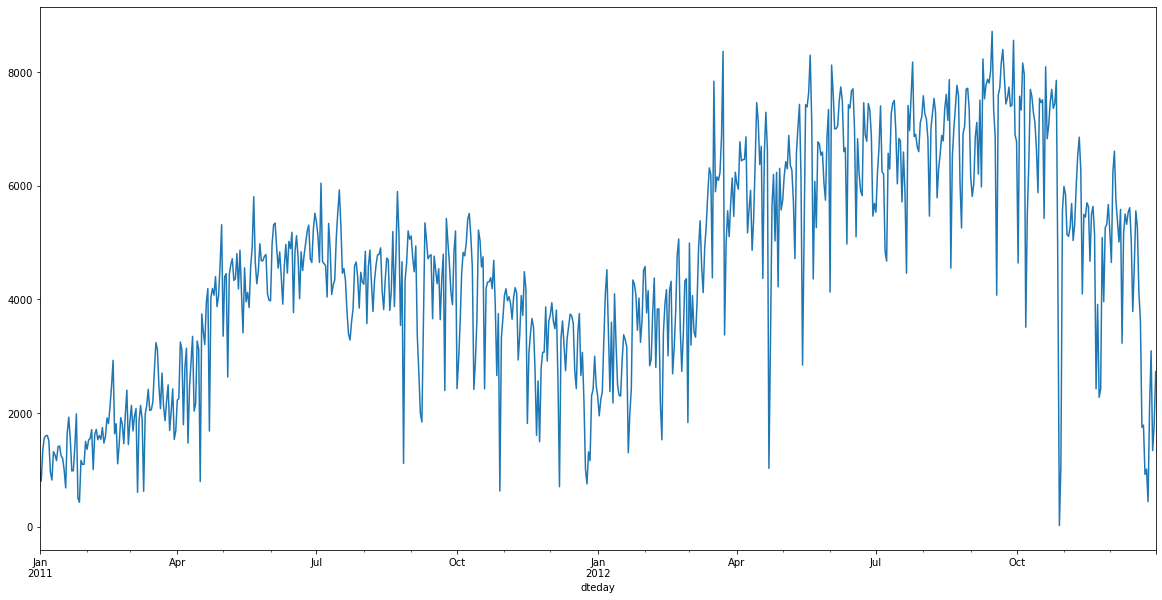

In [9]:
df1.cnt.plot()

<AxesSubplot:xlabel='dteday'>

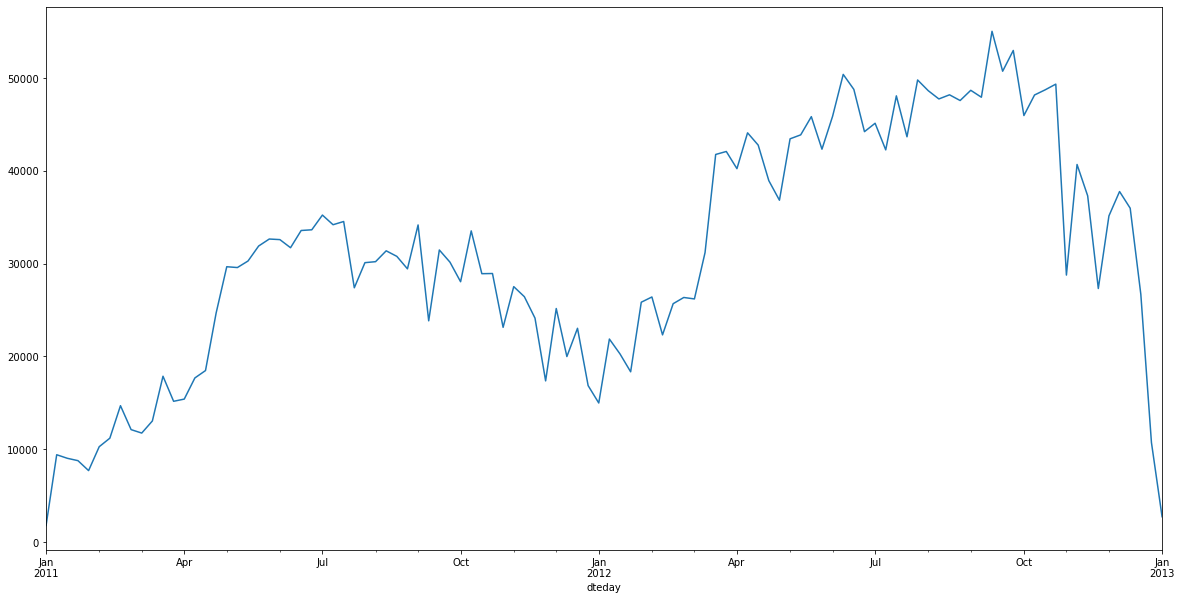

In [10]:
#resampling by weeks and plotting the sum
df1.cnt.resample("W").sum().plot()

<AxesSubplot:xlabel='dteday'>

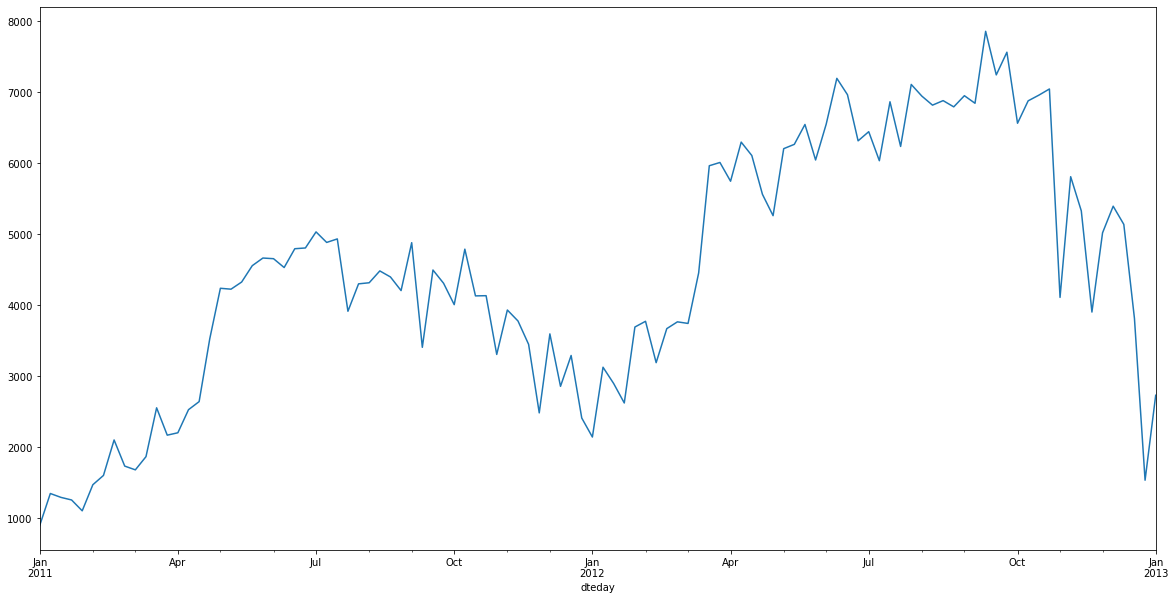

In [11]:
df1.cnt.resample("W").mean().plot()

<AxesSubplot:xlabel='dteday'>

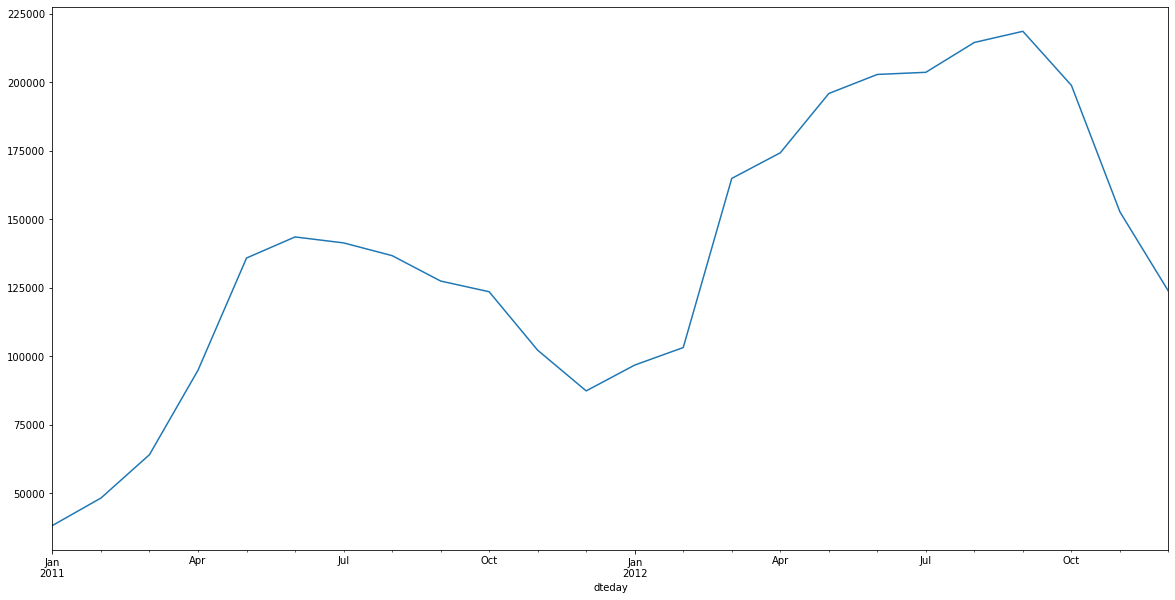

In [12]:
df1.cnt.resample("M").sum().plot()

<AxesSubplot:xlabel='dteday'>

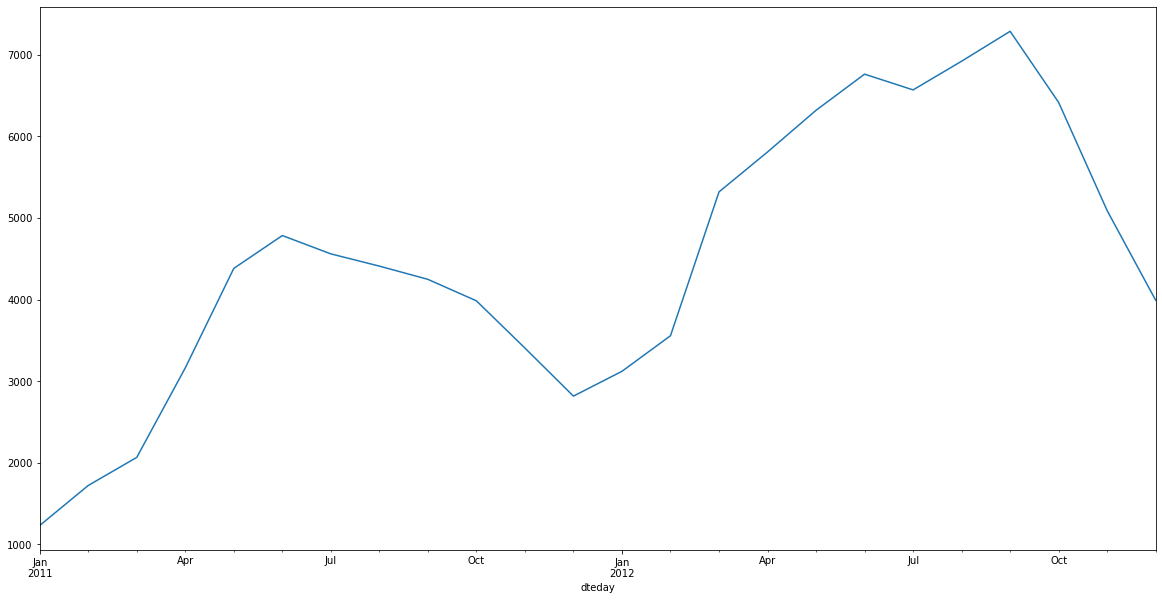

In [13]:
df1.cnt.resample("M").mean().plot()

<AxesSubplot:xlabel='dteday'>

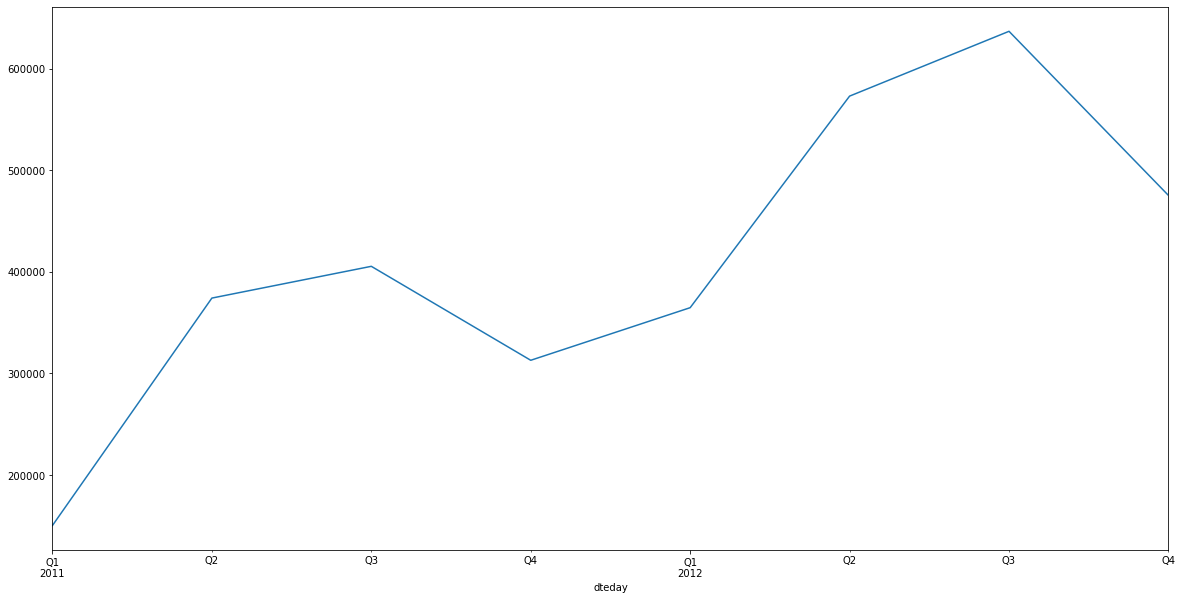

In [14]:
df1.cnt.resample("Q").sum().plot()

<AxesSubplot:xlabel='dteday'>

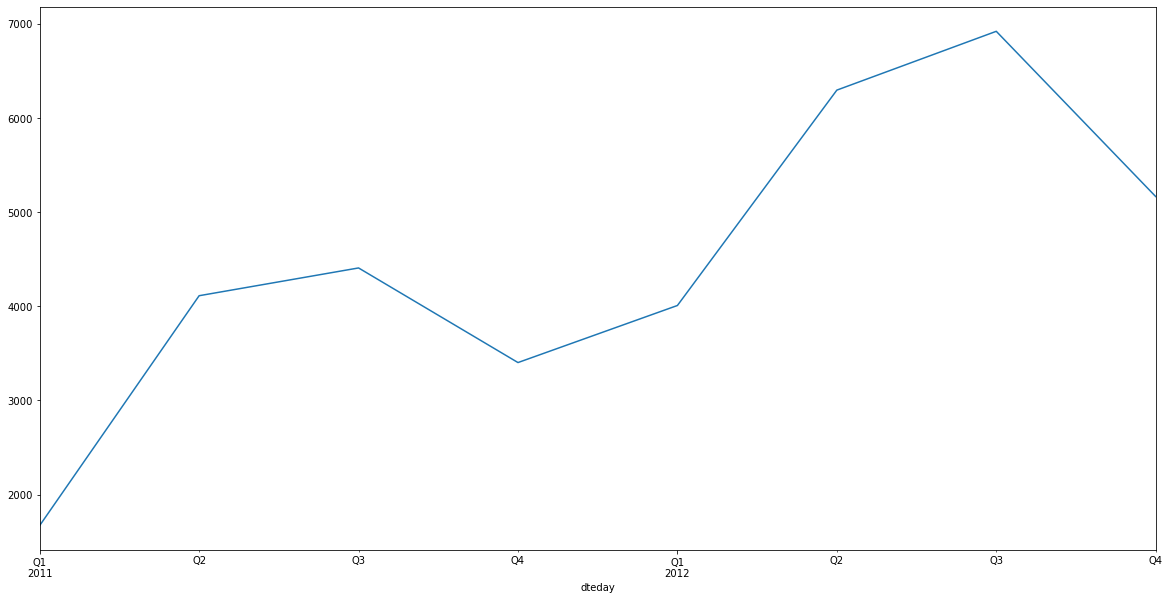

In [15]:
df1.cnt.resample("Q").mean().plot()

We see a seasonal trend here 
Q1-Q2-Sharp increase
Q2-Q3-Moderate increase
Q3-Q4-sharp decrease
Q4-Q1-increase

# EDA

In [16]:
# getting names of days
df1["dayname"]=df1.dteday.dt.strftime('%A')

<AxesSubplot:ylabel='Frequency'>

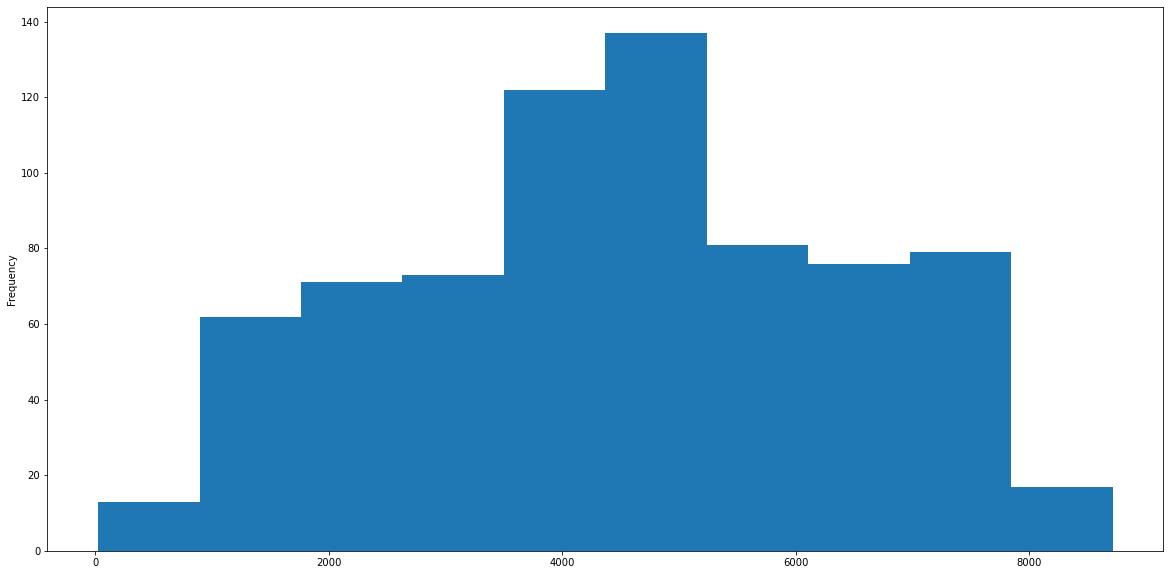

In [17]:
df1.cnt.plot.hist()

In [18]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname'],
      dtype='object')

In [19]:
def quarter(month):
    if month in [1,2,3]:
        return "Q1"
    elif month in [4,5,6]:
        return "Q2"
    elif month in [7,8,9]:
        return "Q3"
    else:
        return "Q4"

In [20]:
df1["Quarter"]=df1.mnth.apply(quarter)

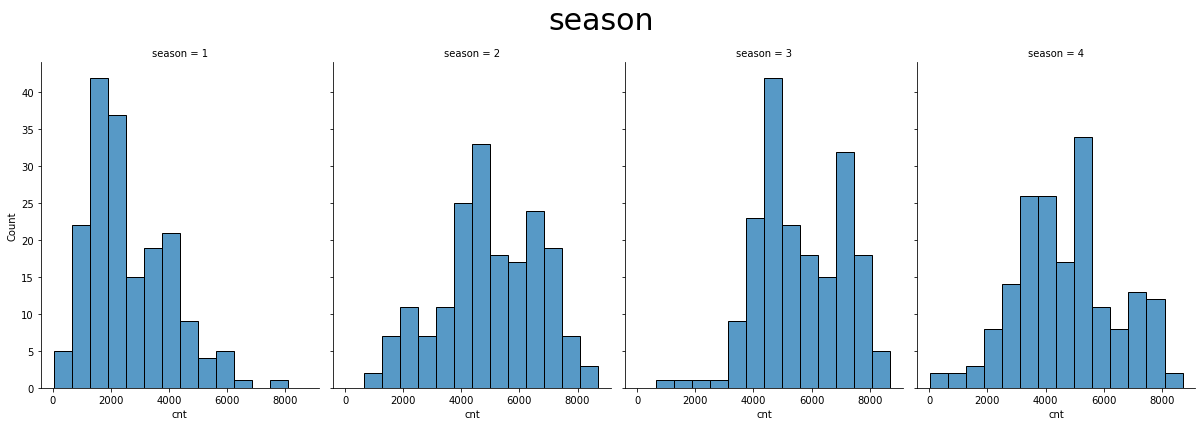

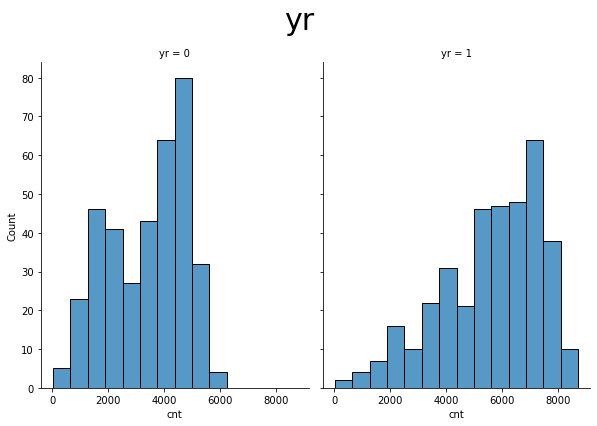

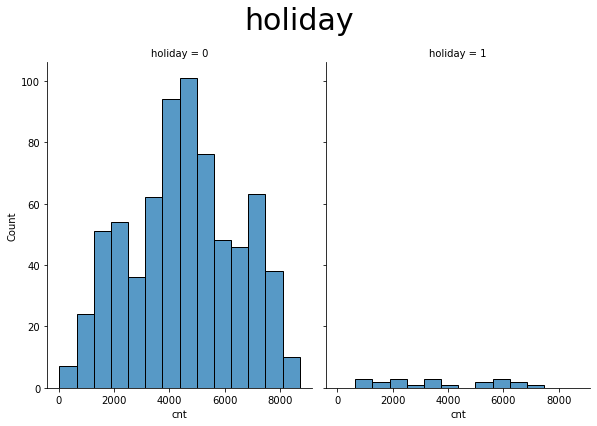

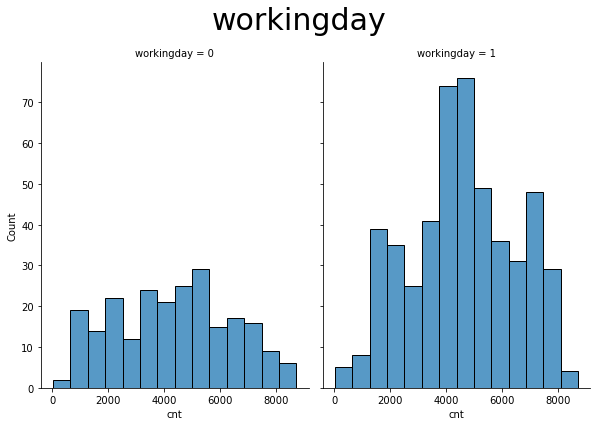

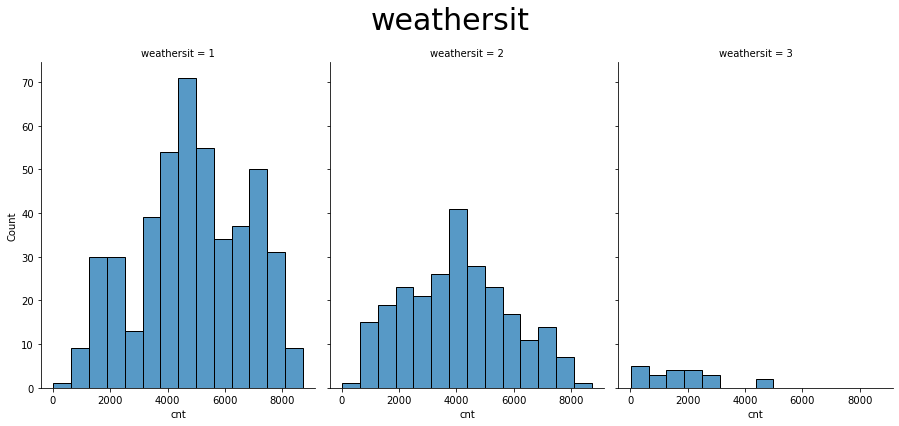

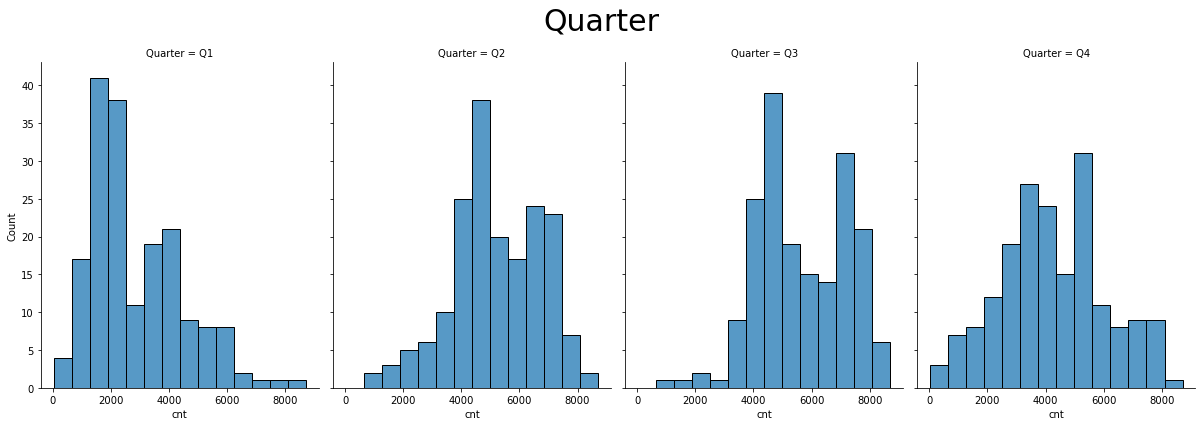

In [21]:
for i in ['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter"]:
    
    rel=sns.displot(x="cnt",data=df1,col=i,height=6, aspect=.7)
    rel.fig.suptitle(i,fontsize=50,size=30)
    plt.tight_layout()

In [22]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter'],
      dtype='object')

In [23]:
cont=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

<AxesSubplot:>

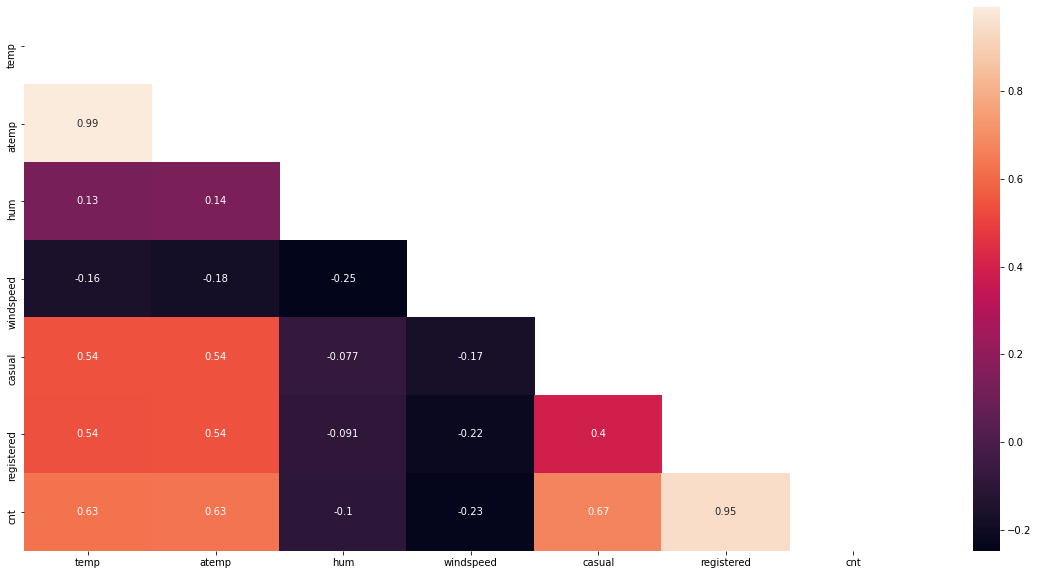

In [24]:
#plotting the correlation matrix
corr=df1[cont].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True)

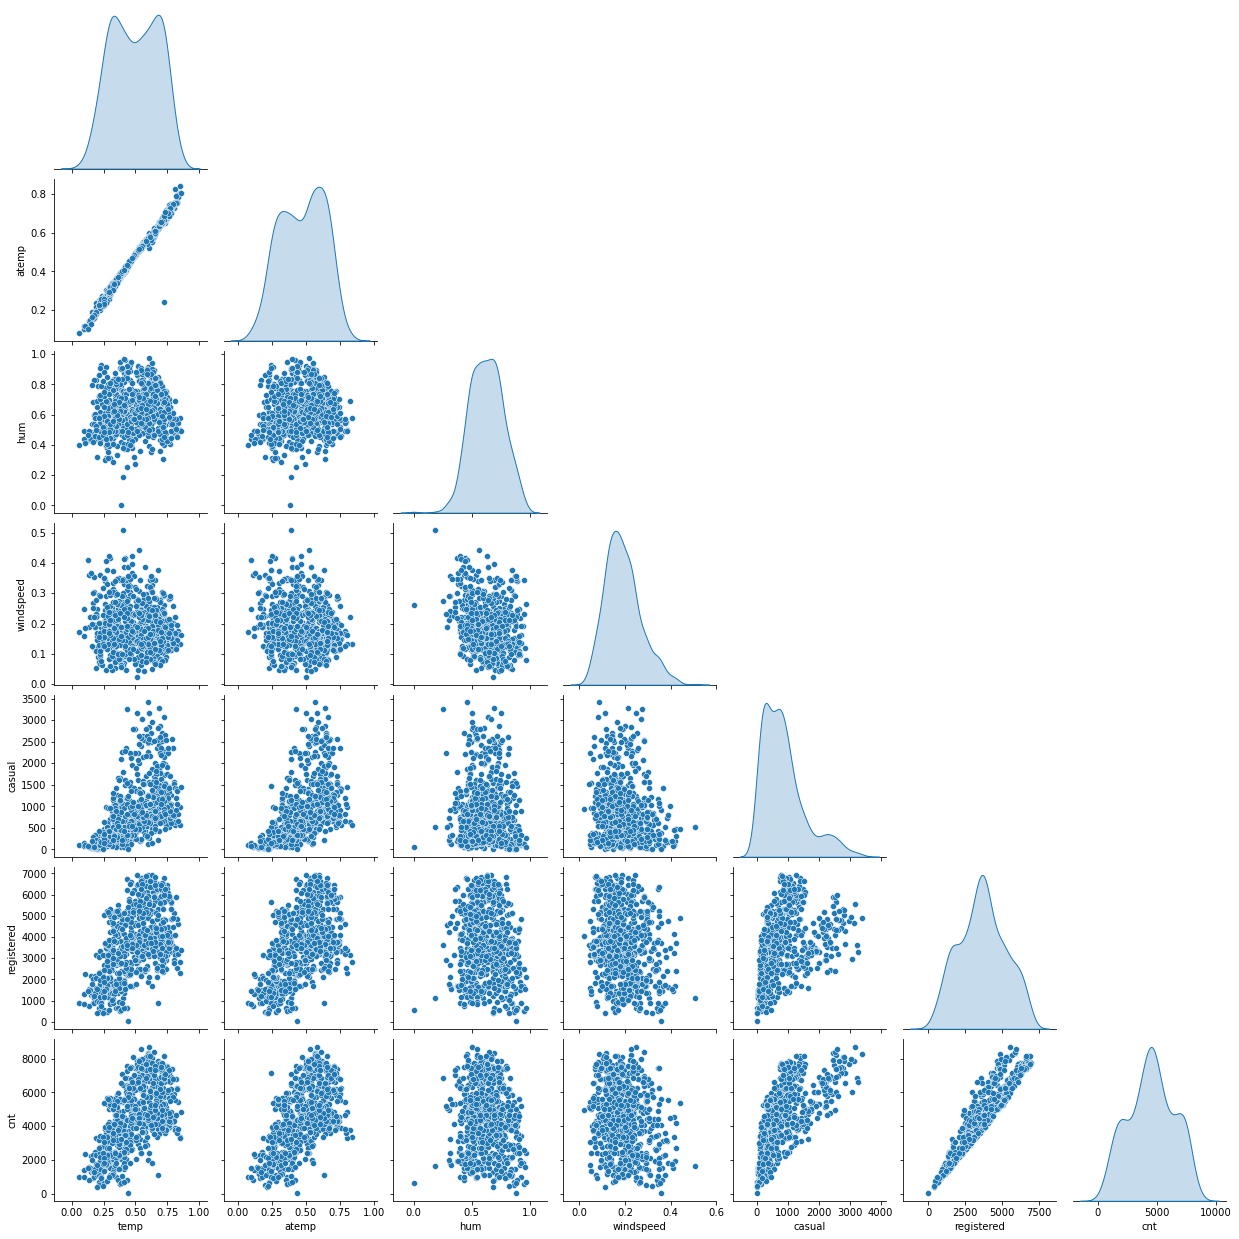

In [25]:
sns.pairplot(df1[cont],corner=True,diag_kind="kde")

In [26]:
#creating a new feature
df2=df1.copy()
def daytype(l):
    a=l[0]
    b=l[1]
    if (a==0) & (b==0):
        return "Weekend"
    elif (a==1) & (b==0):
        return "WeekDay_Holiday"
    elif (a==0) & (b==1):
        return "Normal_WorkingDay"

In [27]:
d=pd.Series(df2[['holiday','workingday']].values.tolist(),index=df2.index).apply(daytype)

In [28]:
df2["daytype"]=d

In [29]:
df2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay


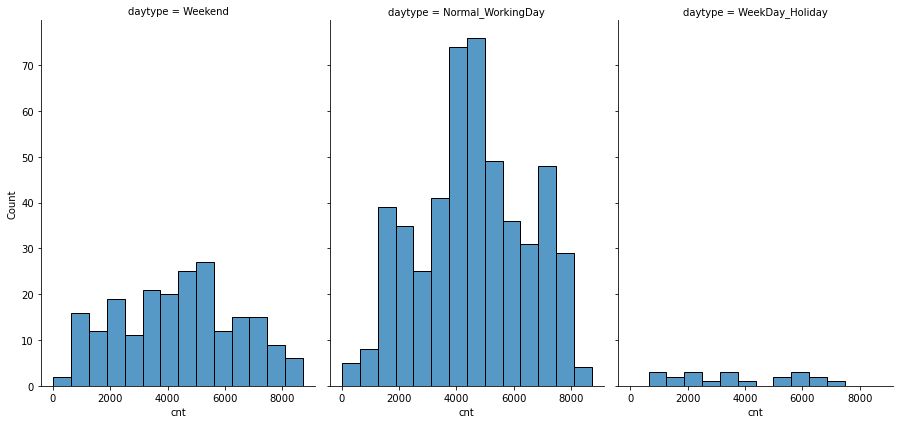

In [30]:
sns.displot(x="cnt",data=df2,col="daytype",height=6, aspect=.7)

In [31]:
df3=df2.drop("dteday",axis=1)

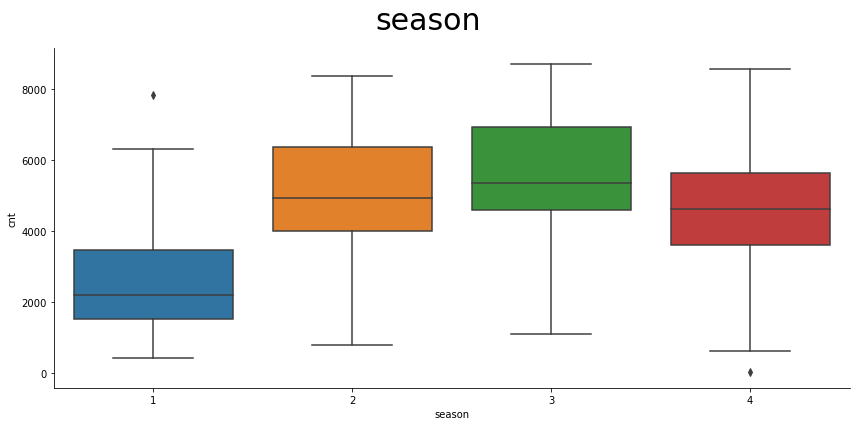

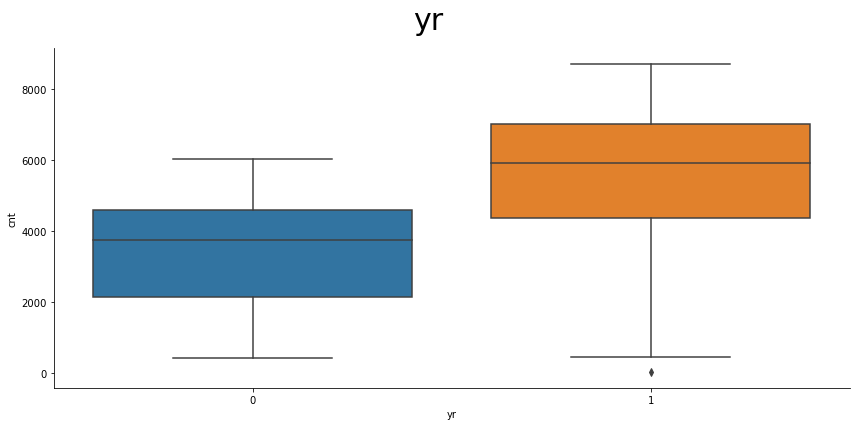

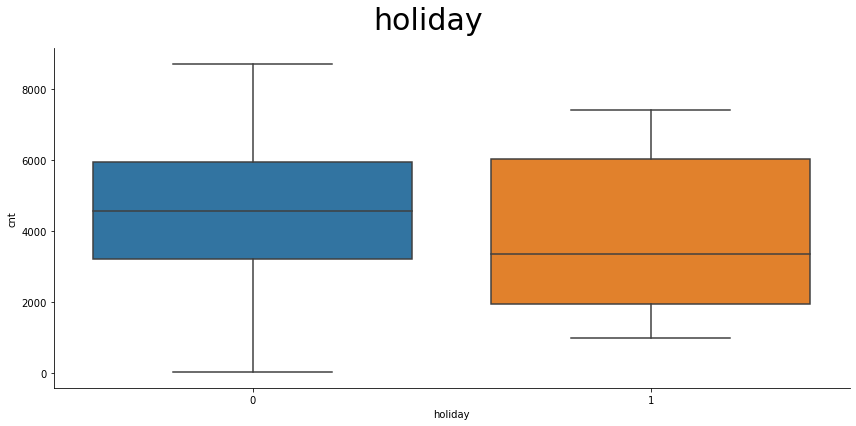

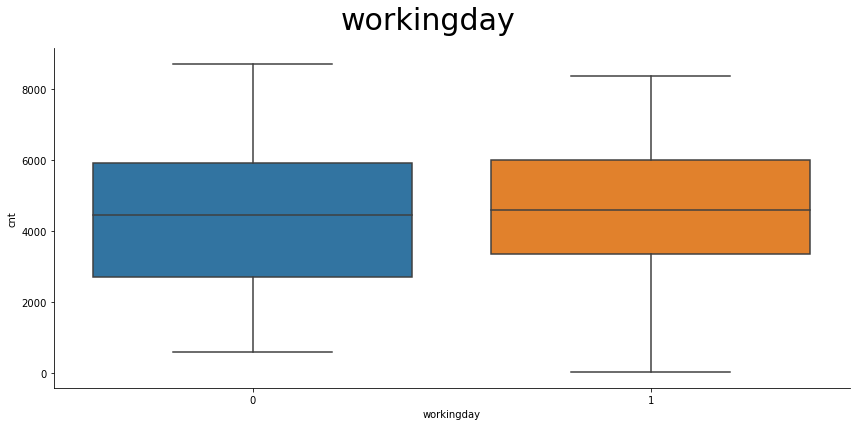

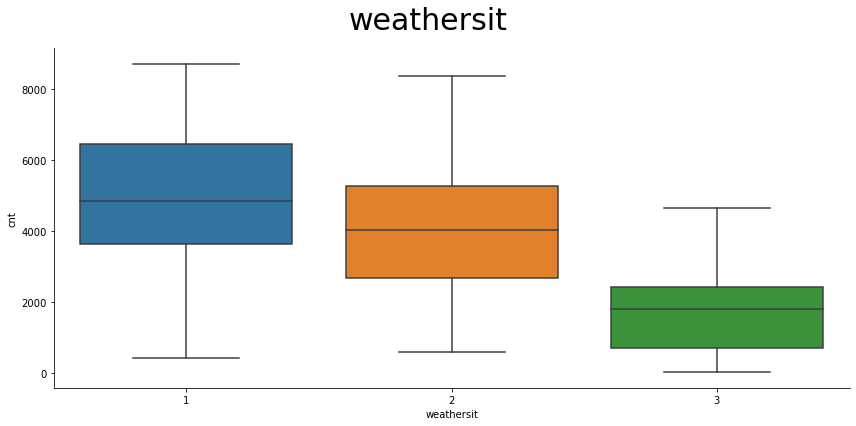

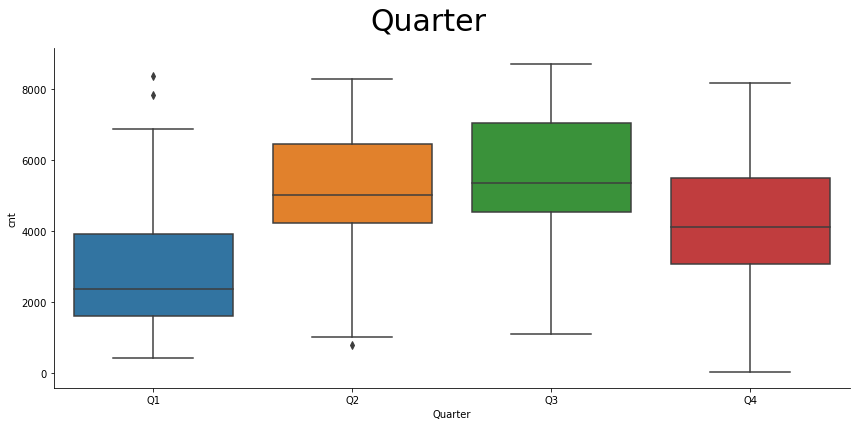

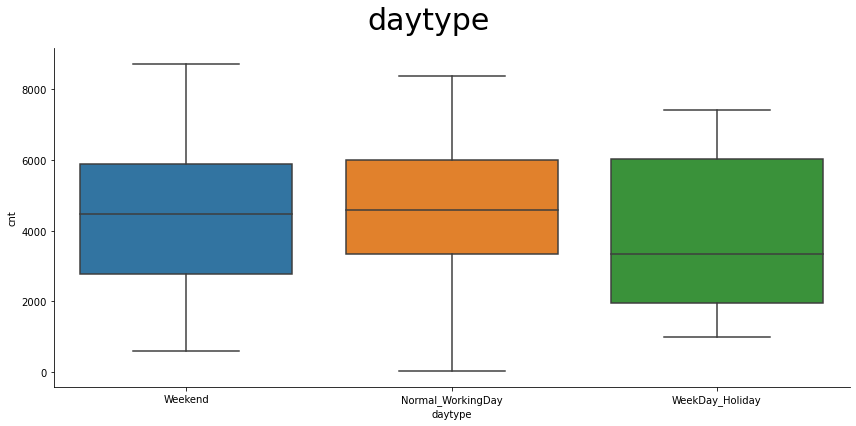

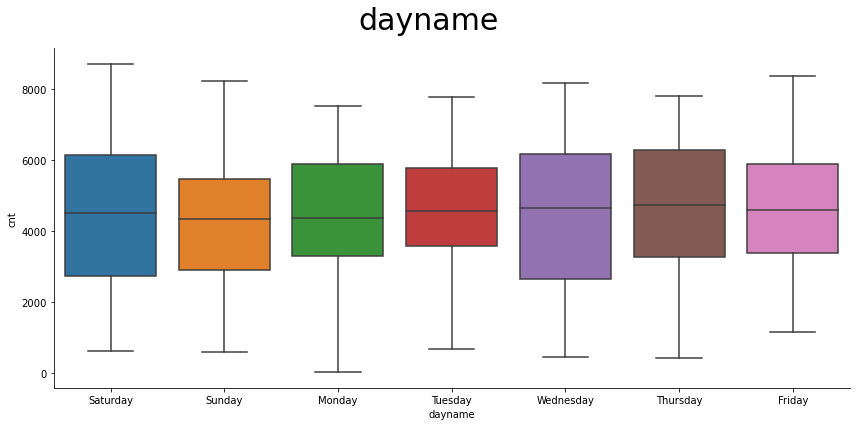

In [32]:
for i in ['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter","daytype","dayname"]:
    
    rel=sns.catplot(x=i,data=df3,y="cnt",height=6, aspect=2,kind="box")
    rel.fig.suptitle(i,fontsize=50,size=30)
    plt.tight_layout()

In [33]:
df3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay


In [34]:
#creating another feature named weekend
def weekend(day):
    if(day in ["Saturday","Sunday"]):
        return 1
    else:
        return 0

df3["weekend"]=df3.dayname.apply(weekend)

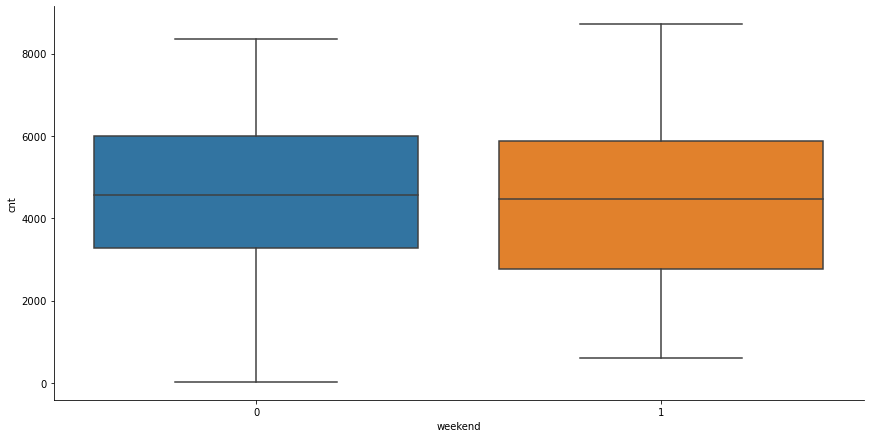

In [35]:
sns.catplot(x="weekend",data=df3,y="cnt",height=6,aspect=2,kind="box")

In [71]:
cat=['season', 'yr', 'holiday','workingday', 'weathersit',"Quarter","daytype","dayname","weekend"]

<AxesSubplot:xlabel='daytype', ylabel='cnt'>

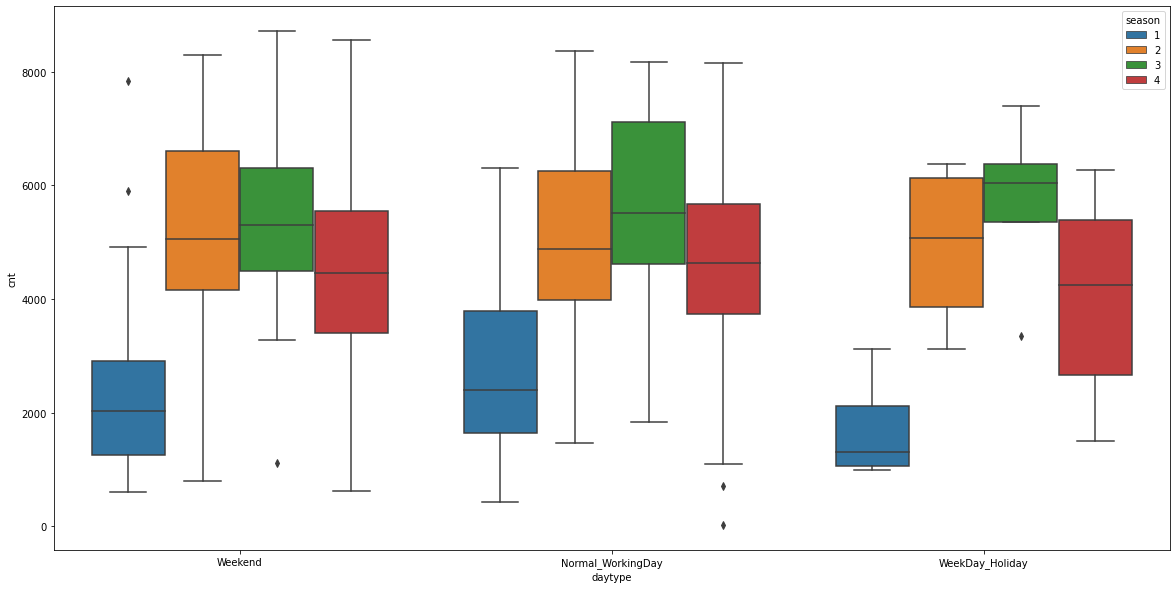

In [37]:
sns.boxplot(x="daytype",y="cnt",data=df3,hue="season")

<AxesSubplot:xlabel='daytype', ylabel='cnt'>

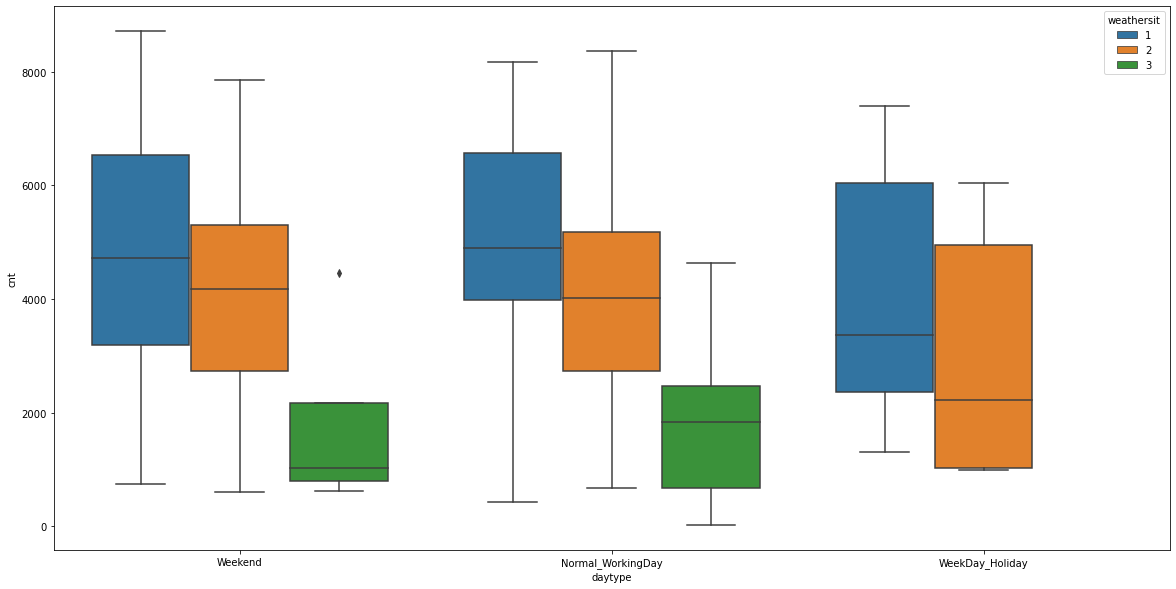

In [38]:
sns.boxplot(x="daytype",y="cnt",data=df3,hue="weathersit")

In [84]:
def mean_plot(k):
    d=df3.groupby(k)["cnt"].mean()
    sns.barplot(x=d.index,y=d)

In [85]:
cat

['season',
 'yr',
 'holiday',
 'workingday',
 'weathersit',
 'Quarter',
 'daytype',
 'dayname',
 'weekend']

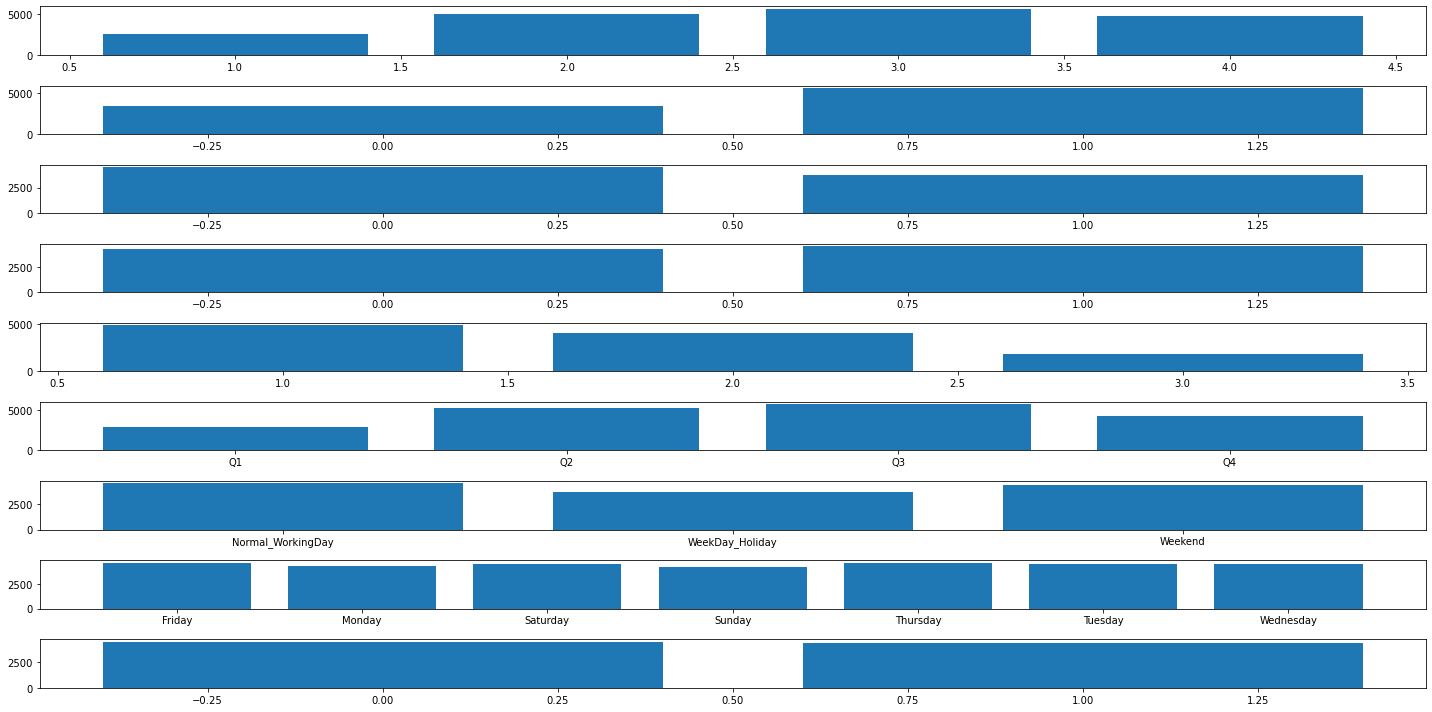

In [97]:
fig,axes=plt.subplots(9,1)
c=0
for i in cat:
    d=df3.groupby(i)["cnt"].mean()
    axes[c].bar(x=d.index,height=d)
    c+=1
    plt.tight_layout()

# Normality Check

In [42]:
from scipy.stats import shapiro
stat, p = shapiro(df1.cnt)
print(stat,p)

from scipy.stats import normaltest
stat, p = normaltest(df1.cnt)
print(stat,p)

0.9801235198974609 2.080002481363863e-08
62.70766376180256 2.4165947497109103e-14


# Bivariate analysis

In [45]:
from itertools import combinations

In [46]:

cont

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [47]:
c=list(combinations(cont,2))
c

[('temp', 'atemp'),
 ('temp', 'hum'),
 ('temp', 'windspeed'),
 ('temp', 'casual'),
 ('temp', 'registered'),
 ('temp', 'cnt'),
 ('atemp', 'hum'),
 ('atemp', 'windspeed'),
 ('atemp', 'casual'),
 ('atemp', 'registered'),
 ('atemp', 'cnt'),
 ('hum', 'windspeed'),
 ('hum', 'casual'),
 ('hum', 'registered'),
 ('hum', 'cnt'),
 ('windspeed', 'casual'),
 ('windspeed', 'registered'),
 ('windspeed', 'cnt'),
 ('casual', 'registered'),
 ('casual', 'cnt'),
 ('registered', 'cnt')]

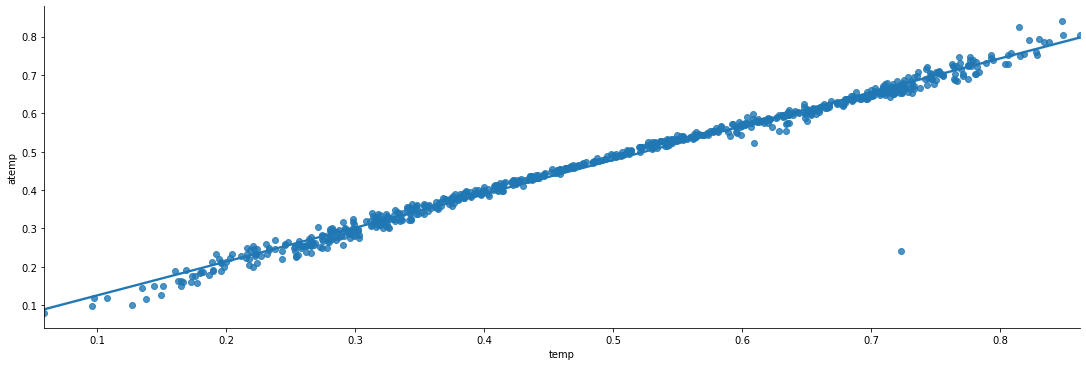

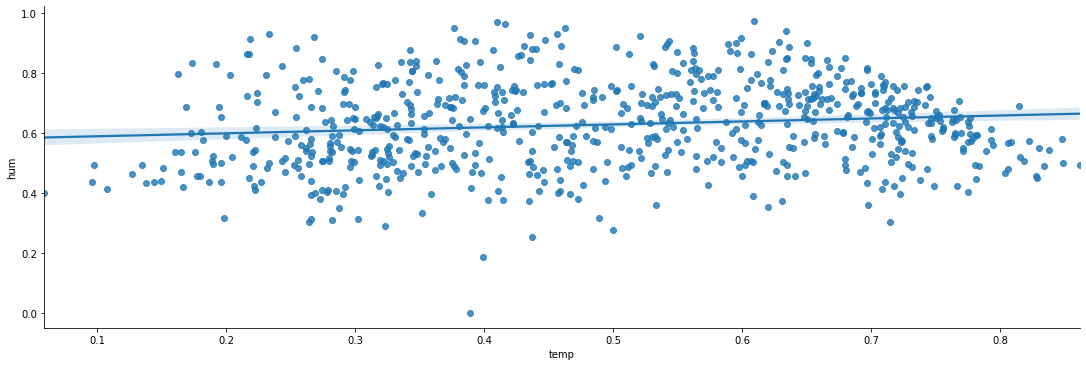

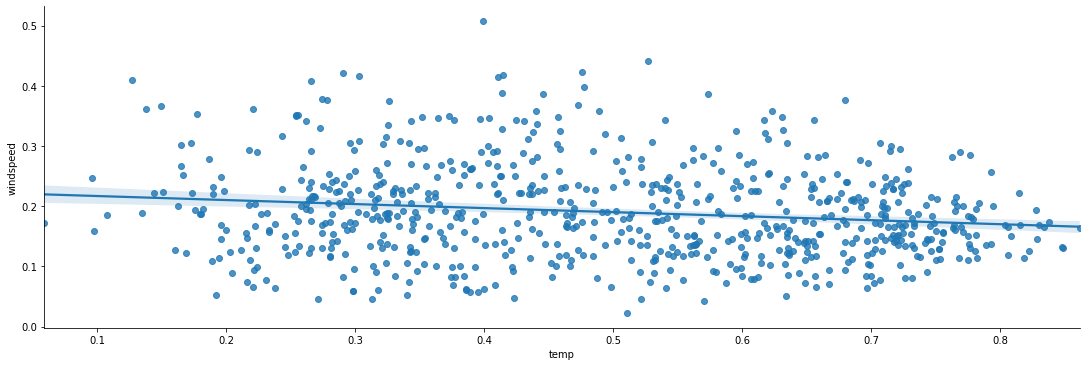

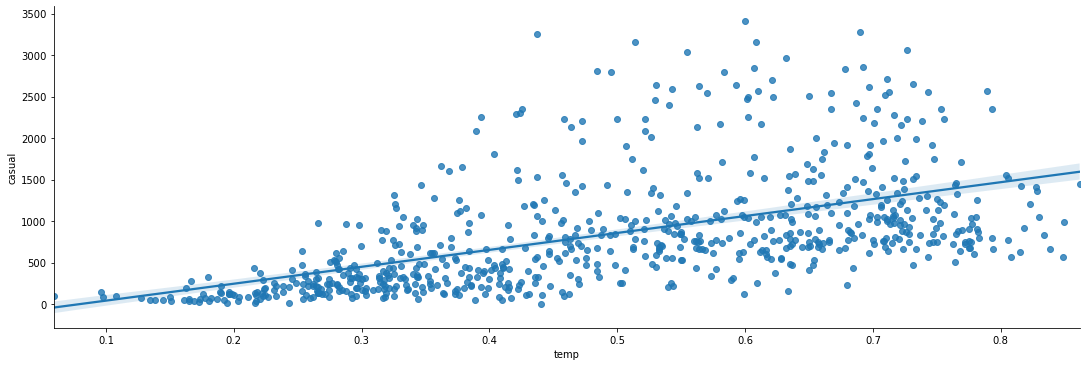

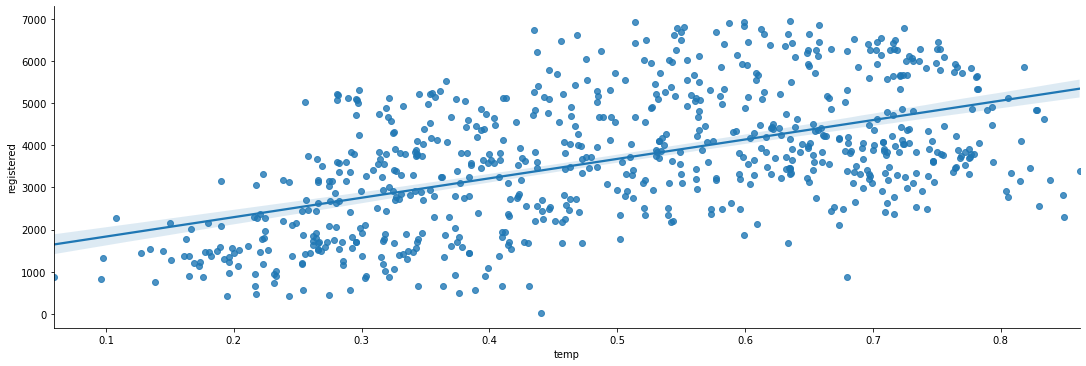

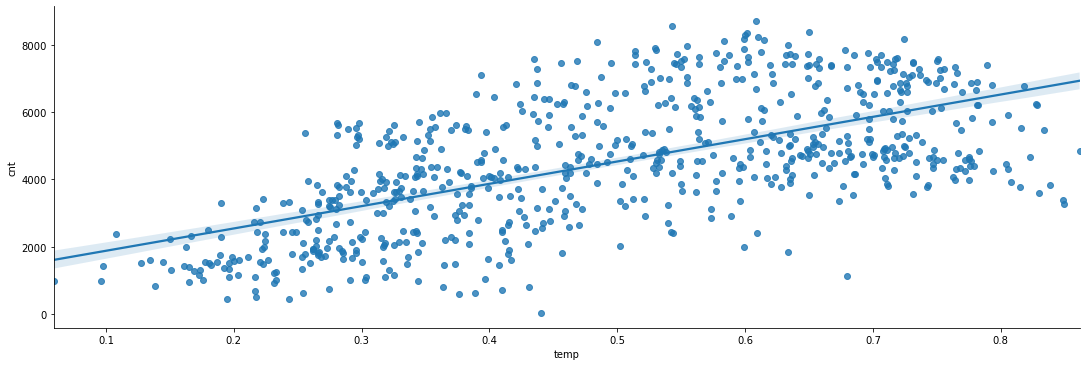

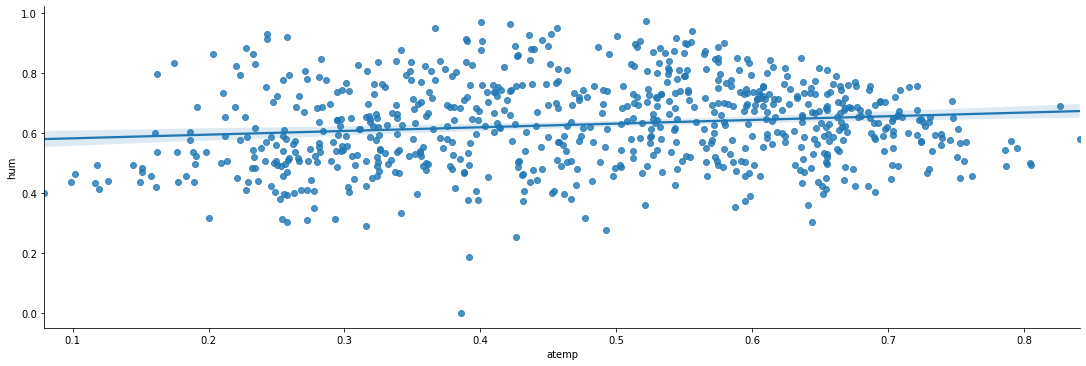

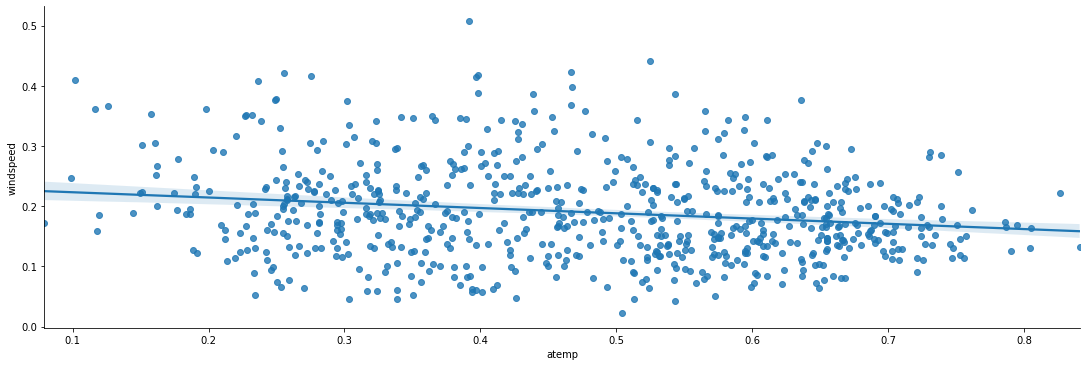

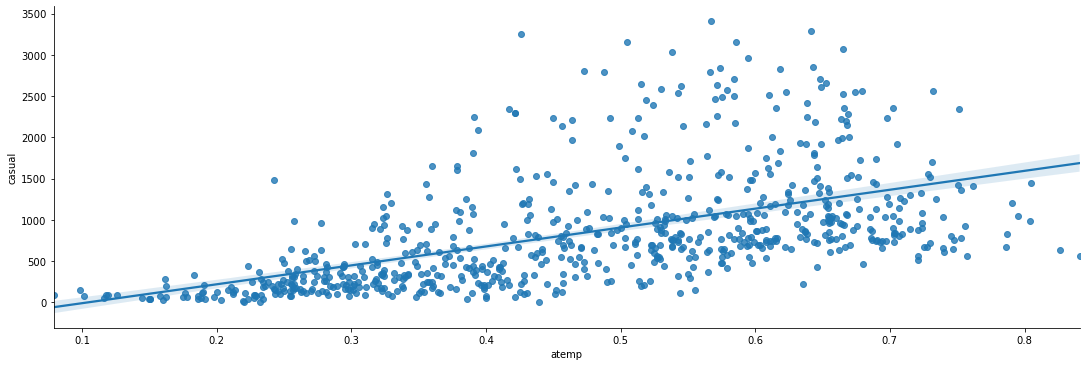

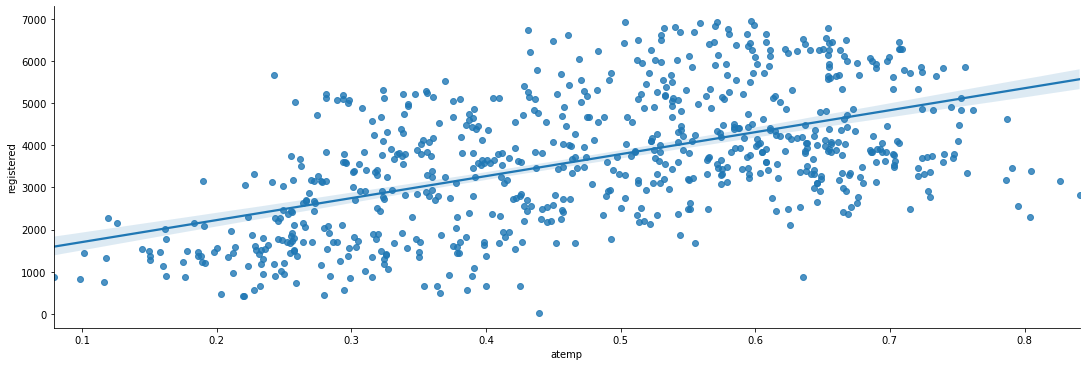

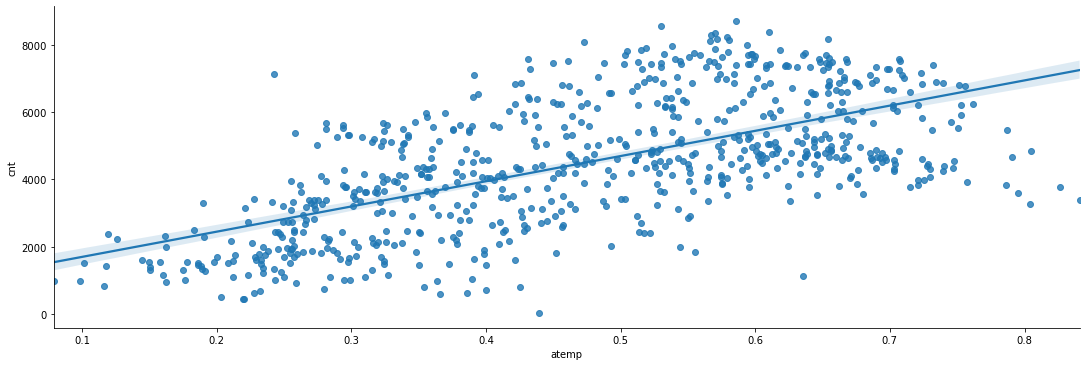

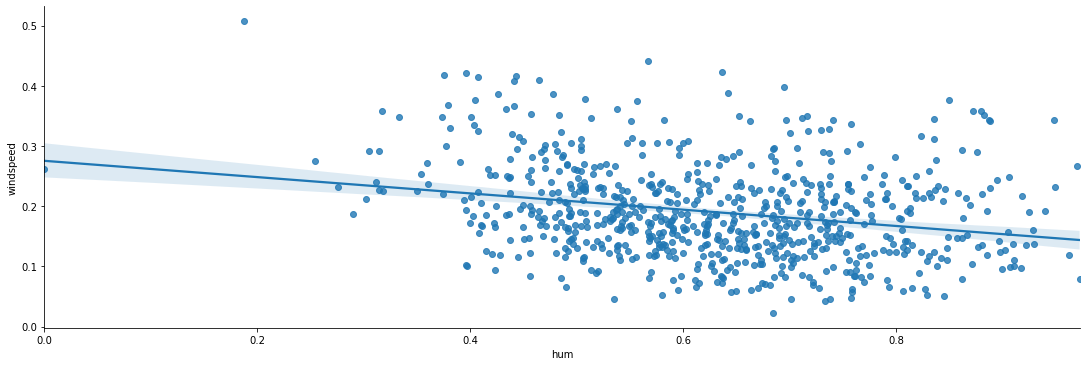

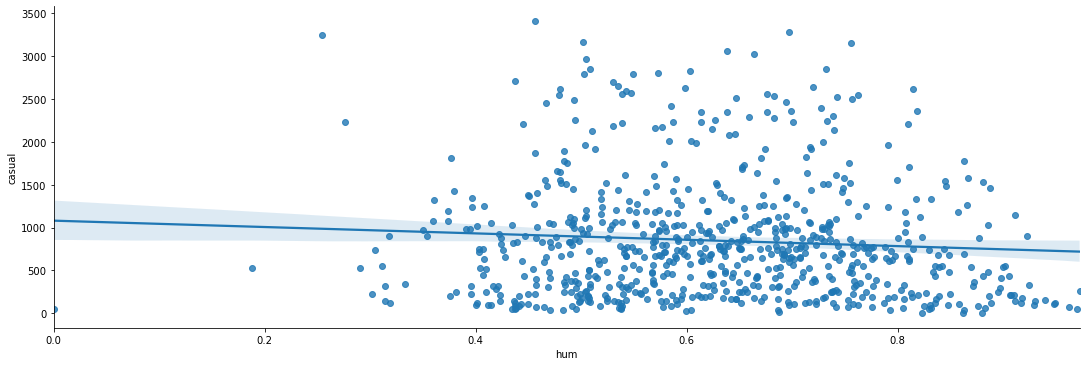

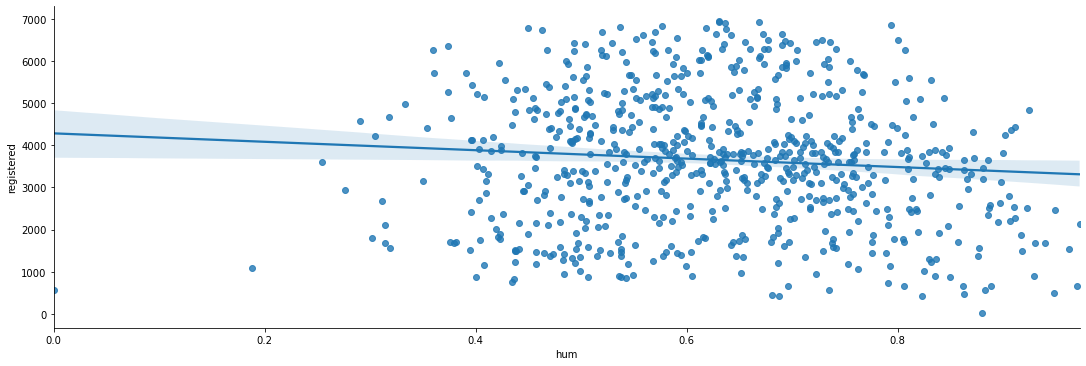

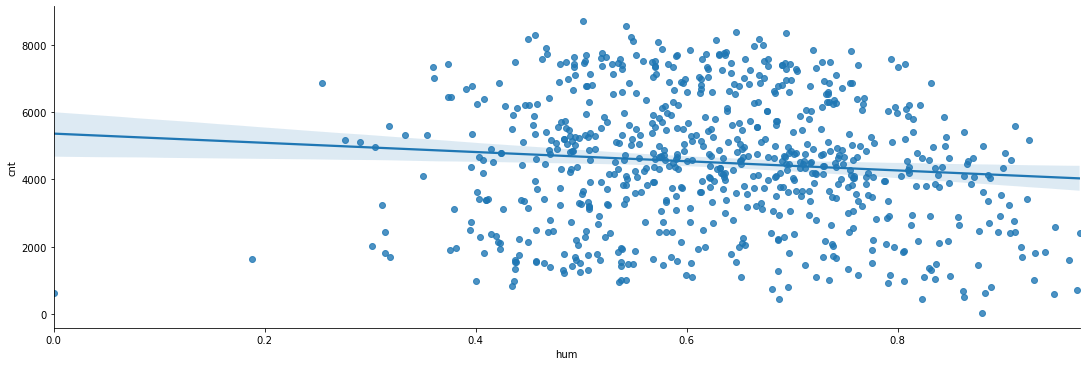

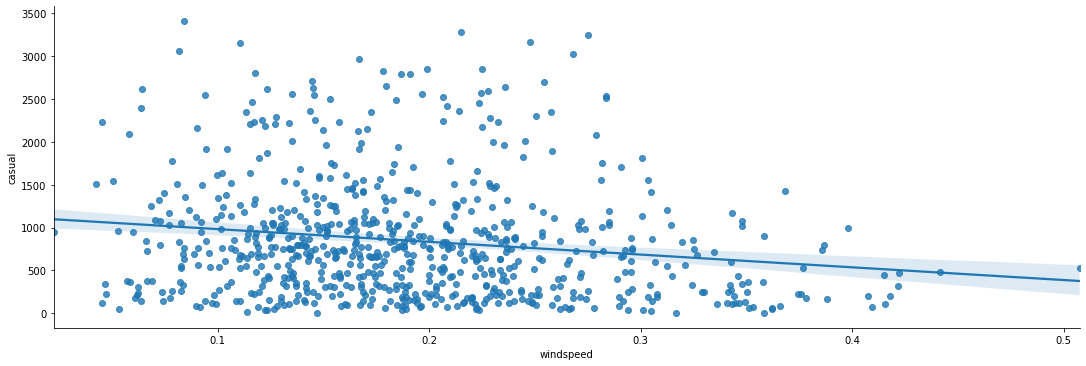

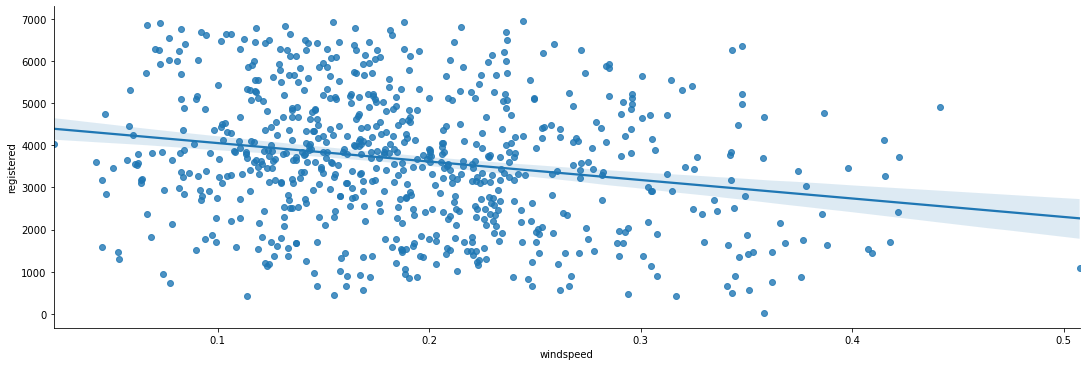

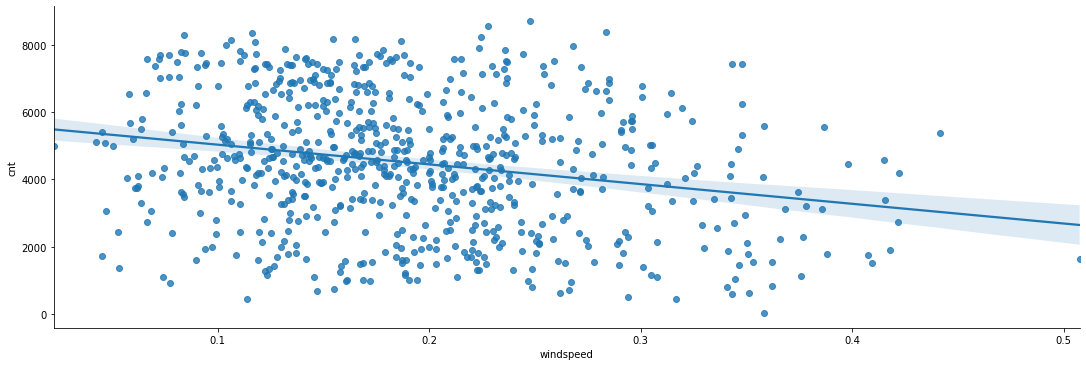

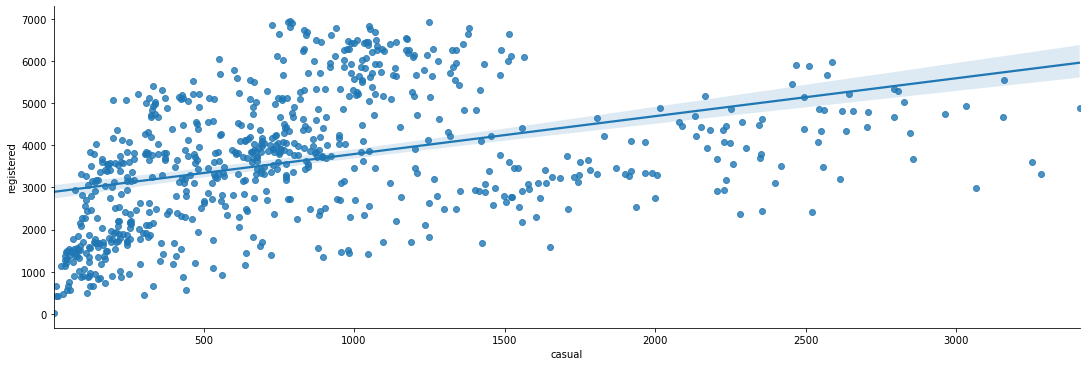

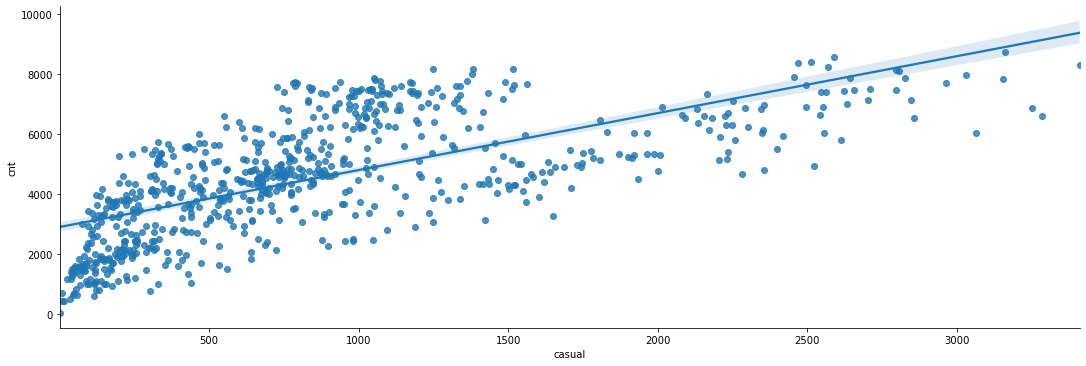

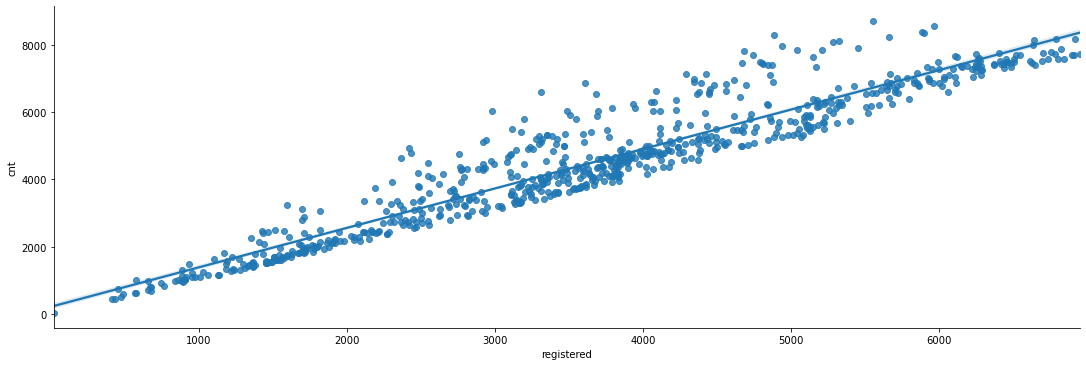

In [48]:
#plotting scatter plot taking 2 continous variables at a time
def scatter(s):
    sns.lmplot(x=s[0],y=s[1],data=df3,aspect=3)

for i in c:
    scatter(i)

In [49]:
y=df3.cnt

In [50]:
#to get the regression equations
import statsmodels.api as sm
def regression_results(x):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [51]:
for i in cont[:-1]:
    v=df3[i]
    print(i)
    regression_results(v)
    print(" ")

temp
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.81e-81
Time:                        09:23:31   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537    

# Correlation

In [52]:
from scipy import stats

In [53]:
from itertools import combinations
comb=combinations(cont,2)
c=list(comb)
print(c)

[('temp', 'atemp'), ('temp', 'hum'), ('temp', 'windspeed'), ('temp', 'casual'), ('temp', 'registered'), ('temp', 'cnt'), ('atemp', 'hum'), ('atemp', 'windspeed'), ('atemp', 'casual'), ('atemp', 'registered'), ('atemp', 'cnt'), ('hum', 'windspeed'), ('hum', 'casual'), ('hum', 'registered'), ('hum', 'cnt'), ('windspeed', 'casual'), ('windspeed', 'registered'), ('windspeed', 'cnt'), ('casual', 'registered'), ('casual', 'cnt'), ('registered', 'cnt')]


In [54]:
def corr(x,y):
    s=stats.pearsonr(df1[x],df1[y])
    if(s[1]<0.05):
        print("Correlation coefficient is reliable")
    else:
        print("Correlation coefficient is not reliable")
    print(s)

In [55]:
for i in c:
    print(i)
    corr(i[0],i[1])

('temp', 'atemp')
Correlation coefficient is reliable
(0.9917015532294637, 0.0)
('temp', 'hum')
Correlation coefficient is reliable
(0.12696293902718872, 0.0005800887705373723)
('temp', 'windspeed')
Correlation coefficient is reliable
(-0.15794412041209957, 1.7868574360644856e-05)
('temp', 'casual')
Correlation coefficient is reliable
(0.5432846616821876, 2.3088421872798114e-57)
('temp', 'registered')
Correlation coefficient is reliable
(0.5400119661617863, 1.4462286512707367e-56)
('temp', 'cnt')
Correlation coefficient is reliable
(0.627494009033492, 2.8106223975907754e-81)
('atemp', 'hum')
Correlation coefficient is reliable
(0.13998805994655983, 0.00014640238006982662)
('atemp', 'windspeed')
Correlation coefficient is reliable
(-0.18364296669082852, 5.755773920540957e-07)
('atemp', 'casual')
Correlation coefficient is reliable
(0.5438636902622048, 1.665311920737755e-57)
('atemp', 'registered')
Correlation coefficient is reliable
(0.5441917576380139, 1.3834882576908133e-57)
('atemp',

# TTest

In [56]:
def ttest(col):
    print(f"FOR {col}")
    W=df3.groupby(col)
    W1=W.get_group(1)
    W0=W.get_group(0)
    print(stats.ttest_ind(W1["cnt"],W0["cnt"]))

In [57]:
df3.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter', 'daytype', 'weekend'],
      dtype='object')

In [58]:
tc=df3.columns[[1,3,5,-1]]

In [59]:
for i in tc:
    ttest(i)

FOR yr
Ttest_indResult(statistic=18.57123004907546, pvalue=2.4835399044508365e-63)
FOR holiday
Ttest_indResult(statistic=-1.8497137724448645, pvalue=0.06475935792611008)
FOR workingday
Ttest_indResult(statistic=1.6543102137118633, pvalue=0.09849496160024915)
FOR weekend
Ttest_indResult(statistic=-1.01602834564195, pvalue=0.3099529697475421)


# Tukey Test

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison

In [61]:
def tukey(c):
    mc=MultiComparison(df3["cnt"],df3[c])
    mcresult=mc.tukeyhsd(0.05)
    print(mcresult.summary())

In [62]:
for i in cat:
    print(i)
    tukey(i)

season
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2 2388.1989  0.001  1965.3265 2811.0714   True
     1      3 3040.1706  0.001  2619.5349 3460.8063   True
     1      4 2124.0303  0.001  1697.6383 2550.4224   True
     2      3  651.9717  0.001   233.0867 1070.8566   True
     2      4 -264.1686 0.3792  -688.8337  160.4965  False
     3      4 -916.1403  0.001 -1338.5781 -493.7025   True
----------------------------------------------------------
yr
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1 2194.1728 0.001 1962.2198 2426.1257   True
--------------------------------------------------------
holiday
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper  

# ZTest for propertions

In [63]:
from statsmodels.stats.proportion import proportions_ztest

In [65]:
def prop_test_registered(c):
    print(c)
    h=df3.groupby(c)
    h1=h["registered","cnt"].sum()
    print(h1)
    stat, pval = proportions_ztest(h1["registered"], h1["cnt"])
    print(stat)
    print(pval)
    print("  ")

In [66]:
for i in tc:
    prop_test_registered(i)

yr
    registered      cnt
yr                     
0       995851  1243103
1      1676811  2049576
-38.30624373430995
0.0
  
holiday
         registered      cnt
holiday                     
0           2616586  3214244
1             56076    78435
70.1572169516443
0.0
  
workingday
            registered      cnt
workingday                     
0               683537  1000269
1              1989125  2292410
-393.4974769809647
0.0
  
weekend
         registered      cnt
weekend                     
0           2045201  2370845
1            627461   921834
379.2308780078829
0.0
  


# Trying to  check non-linear dependency

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [68]:
for i in c:
    dt=DecisionTreeRegressor(max_depth=10)
    x=df3[i[0]].values.reshape(-1,1)
    y=df3[i[1]].values
    scores=cross_val_score(dt,x,y,cv=5,scoring="r2")
    print(i)
    print(scores.mean())

('temp', 'atemp')
0.9273013281898284
('temp', 'hum')
-0.5005791378830993
('temp', 'windspeed')
-0.6620005962529303
('temp', 'casual')
-0.830035751286314
('temp', 'registered')
-2.8286824522003755
('temp', 'cnt')
-2.5650820118998796
('atemp', 'hum')
-0.4427611549820753
('atemp', 'windspeed')
-0.6616829497788979
('atemp', 'casual')
-0.8901147522445132
('atemp', 'registered')
-2.55339869581008
('atemp', 'cnt')
-2.4412770799247254
('hum', 'windspeed')
-0.38457698152790887
('hum', 'casual')
-1.6878144050692914
('hum', 'registered')
-2.9971769519641804
('hum', 'cnt')
-3.3450593696224558
('windspeed', 'casual')
-1.6571377437095662
('windspeed', 'registered')
-2.5473159201177324
('windspeed', 'cnt')
-3.044809378448668
('casual', 'registered')
-2.025416891274502
('casual', 'cnt')
-1.3184549712272857
('registered', 'cnt')
0.30376954962870767


There is probably no non-linear dependency

# Modelling

In [82]:
df4=df3.copy()

In [83]:
df4.reset_index(inplace=True)

In [84]:
df4.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayname,Quarter,daytype,weekend
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Q1,Weekend,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Q1,Weekend,1
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Q1,Normal_WorkingDay,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Q1,Normal_WorkingDay,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Q1,Normal_WorkingDay,0


In [85]:
cont

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [86]:
#since atemp and temp are having high correlation, we are not taking the temp for modelling
cont1=cont[1:4]
cont1

['atemp', 'hum', 'windspeed']

In [87]:
df4.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'dayname', 'Quarter', 'daytype', 'weekend'],
      dtype='object')

In [88]:
cat

['season',
 'yr',
 'holiday',
 'workingday',
 'weathersit',
 'Quarter',
 'daytype',
 'dayname',
 'weekend']

In [261]:
# we are not taking holiday,workingday,dayname and weekend into modelling as the useful information from those variables are
#almost captured in the daytype variable
cat1=['season','yr','weathersit',
 'Quarter',]

In [262]:
y=df4.cnt

In [263]:
df_cont=df4[cont1]
df_cat=df4[cat1]

In [264]:
#changing the datatype to strings
for i in cat1:
    df_cat[i]=df_cat[i].apply(lambda x:str(x))

In [265]:
dum_cat=pd.get_dummies(df_cat,drop_first=True)

In [266]:
dum_cat.head()

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [267]:
df_cont.describe()

,atemp,hum,windspeed
count,731.000000,731.000000,731.000000
mean,0.474354,0.627894,0.190486
std,0.162961,0.142429,0.077498
min,0.079070,0.000000,0.022392
25%,0.337842,0.520000,0.134950
50%,0.486733,0.626667,0.180975
75%,0.608602,0.730209,0.233214
max,0.840896,0.972500,0.507463


As values of the continous variables are already between 0 and 1,we are not applying any scaling 

In [268]:
X=pd.concat([dum_cat,df_cont],axis=1)

In [269]:
X.head()

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q2,Quarter_Q3,Quarter_Q4,atemp,hum,windspeed
0,0,0,0,0,1,0,0,0,0,0.363625,0.805833,0.160446
1,0,0,0,0,1,0,0,0,0,0.353739,0.696087,0.248539
2,0,0,0,0,0,0,0,0,0,0.189405,0.437273,0.248309
3,0,0,0,0,0,0,0,0,0,0.212122,0.590435,0.160296
4,0,0,0,0,0,0,0,0,0,0.229270,0.436957,0.186900


# Linear Regression

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [271]:
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [272]:
regression_results(X,y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          9.55e-258
Time:                        15:52:52   Log-Likelihood:                -5943.1
No. Observations:                 731   AIC:                         1.191e+04
Df Residuals:                     718   BIC:                         1.197e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1606.1904    229.419      7.001   

In [273]:
#dropping irrelevant features
X1=X.drop(["Quarter_Q2","Quarter_Q3"],axis=1)
X1

,season_2,season_3,season_4,yr_1,weathersit_2,weathersit_3,Quarter_Q4,atemp,hum,windspeed
0,0,0,0,0,1,0,0,0.363625,0.805833,0.160446
1,0,0,0,0,1,0,0,0.353739,0.696087,0.248539
2,0,0,0,0,0,0,0,0.189405,0.437273,0.248309
3,0,0,0,0,0,0,0,0.212122,0.590435,0.160296
4,0,0,0,0,0,0,0,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,0,0,0,1,1,0,1,0.226642,0.652917,0.350133
727,0,0,0,1,1,0,1,0.255046,0.590000,0.155471
728,0,0,0,1,1,0,1,0.242400,0.752917,0.124383
729,0,0,0,1,0,0,1,0.231700,0.483333,0.350754


In [274]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)

In [275]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8279901136632662

array([[<AxesSubplot:title={'center':'cnt'}>]], dtype=object)

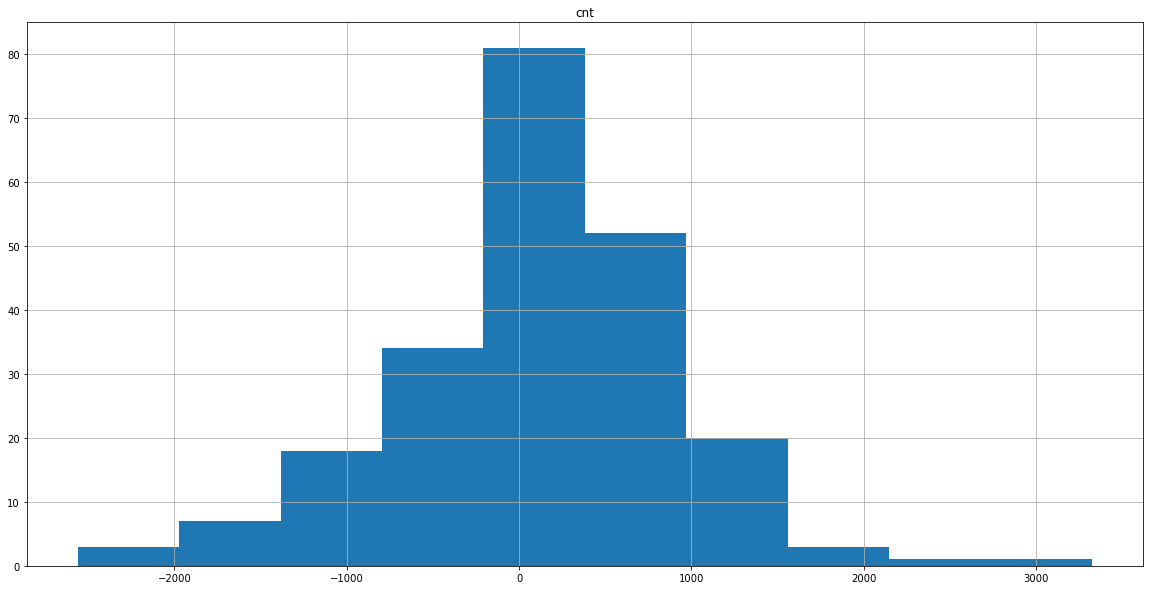

In [276]:
er=y_test-lr.predict(X_test)
e=pd.DataFrame(er)
e.hist()

# DecisionTreeRegression

In [277]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7407365010931581

In [278]:
#gridsearchcv to find the best parameters for Decision Tree Regression
dt=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV 
params={'max_depth':list(range(6,12)),'max_leaf_nodes':list(range(10,18)),
        'min_samples_leaf':list(range(10,16)),'min_samples_split':list(range(10,16))}
clf = GridSearchCV(dt, params)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [279]:
dt1=clf.best_estimator_

In [280]:
dt1.score(X_test,y_test)

0.7667317102675191

# Ridge and Lasso Regression

In [315]:
a=np.logspace(-7,0,50)
a

array([1.00000000e-07, 1.38949549e-07, 1.93069773e-07, 2.68269580e-07,
       3.72759372e-07, 5.17947468e-07, 7.19685673e-07, 1.00000000e-06,
       1.38949549e-06, 1.93069773e-06, 2.68269580e-06, 3.72759372e-06,
       5.17947468e-06, 7.19685673e-06, 1.00000000e-05, 1.38949549e-05,
       1.93069773e-05, 2.68269580e-05, 3.72759372e-05, 5.17947468e-05,
       7.19685673e-05, 1.00000000e-04, 1.38949549e-04, 1.93069773e-04,
       2.68269580e-04, 3.72759372e-04, 5.17947468e-04, 7.19685673e-04,
       1.00000000e-03, 1.38949549e-03, 1.93069773e-03, 2.68269580e-03,
       3.72759372e-03, 5.17947468e-03, 7.19685673e-03, 1.00000000e-02,
       1.38949549e-02, 1.93069773e-02, 2.68269580e-02, 3.72759372e-02,
       5.17947468e-02, 7.19685673e-02, 1.00000000e-01, 1.38949549e-01,
       1.93069773e-01, 2.68269580e-01, 3.72759372e-01, 5.17947468e-01,
       7.19685673e-01, 1.00000000e+00])

In [316]:
from sklearn.linear_model import Ridge as ridge,Lasso as lasso

In [317]:
ridge_score=[]
lasso_score=[]
for i in a:
    r=ridge(alpha=i)
    l=lasso(alpha=i)
    r.fit(X_train,y_train)
    l.fit(X_train,y_train)
    ridge_score.append(r.score(X_test,y_test))
    lasso_score.append(l.score(X_test,y_test))

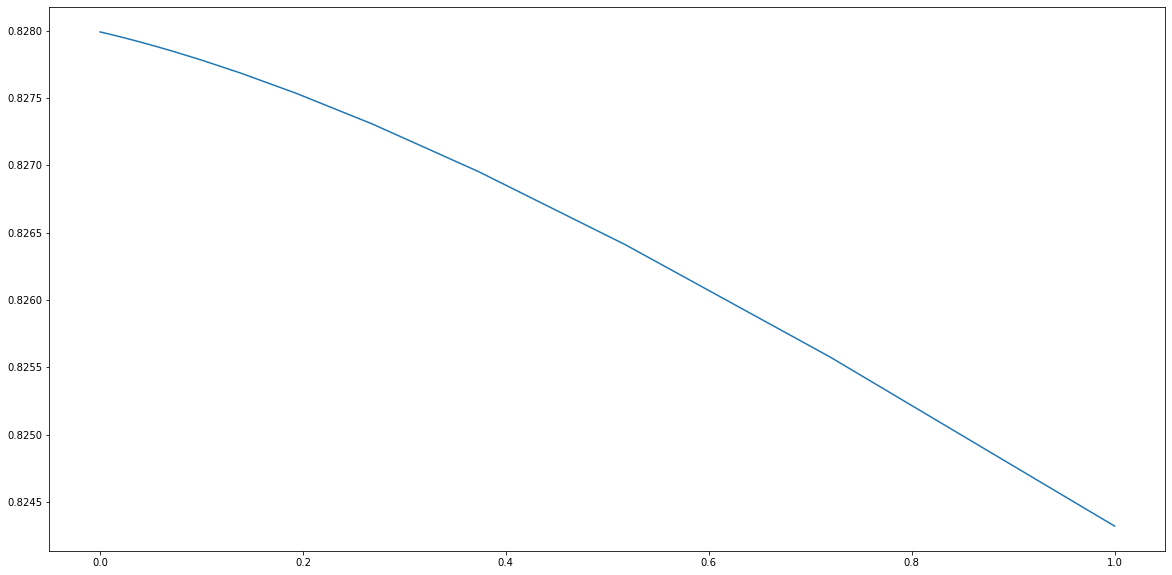

In [318]:
#plotting the scores
plt.plot(a,ridge_score)

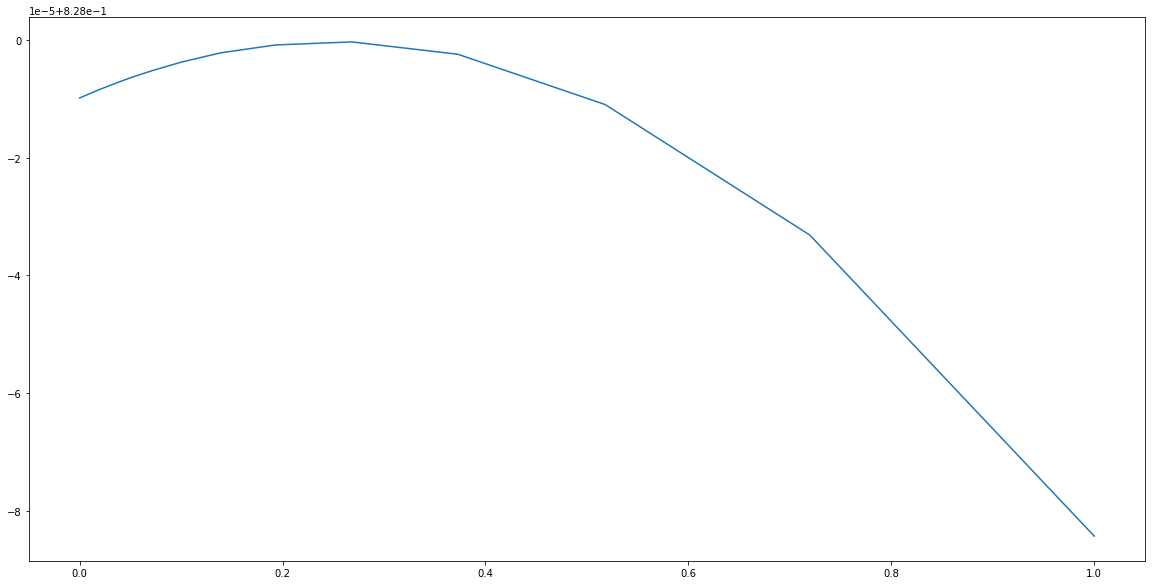

In [319]:
plt.plot(a,lasso_score)

# AdaboostRegressor

In [320]:
from sklearn.ensemble import AdaBoostRegressor
lr=LinearRegression()
rscore=[]
for i in range(50,5000,50):
    reg_ada=AdaBoostRegressor(base_estimator=lr,n_estimators=i)
    reg_ada.fit(X_train,y_train)
    c=reg_ada.score(X_test,y_test)
    rscore.append(c)

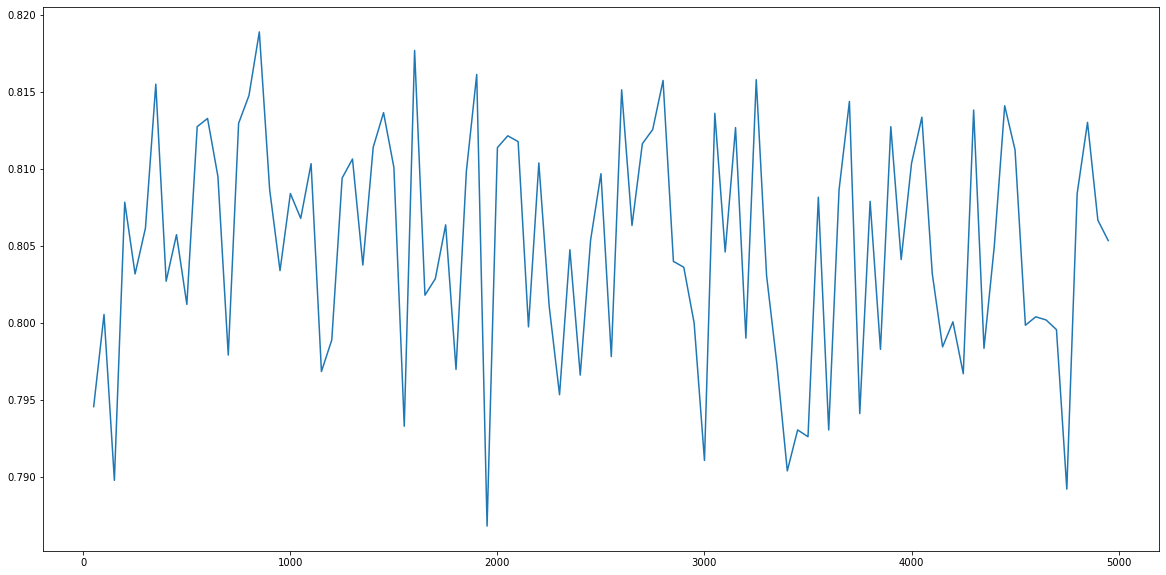

In [321]:
plt.plot(list(range(50,5000,50)),rscore)

In [322]:
max(rscore)

0.8189250283694324

In [323]:
dt=DecisionTreeRegressor(max_depth=6,
 max_leaf_nodes= 16,
 min_samples_leaf= 10,
 min_samples_split= 10)
rscore=[]
for i in range(50,5000,50):
    reg_ada=AdaBoostRegressor(base_estimator=dt,n_estimators=i)
    reg_ada.fit(X_train,y_train)
    y_pred=reg_ada.predict(X_test)
    rscore.append(r2_score(y_test,y_pred))

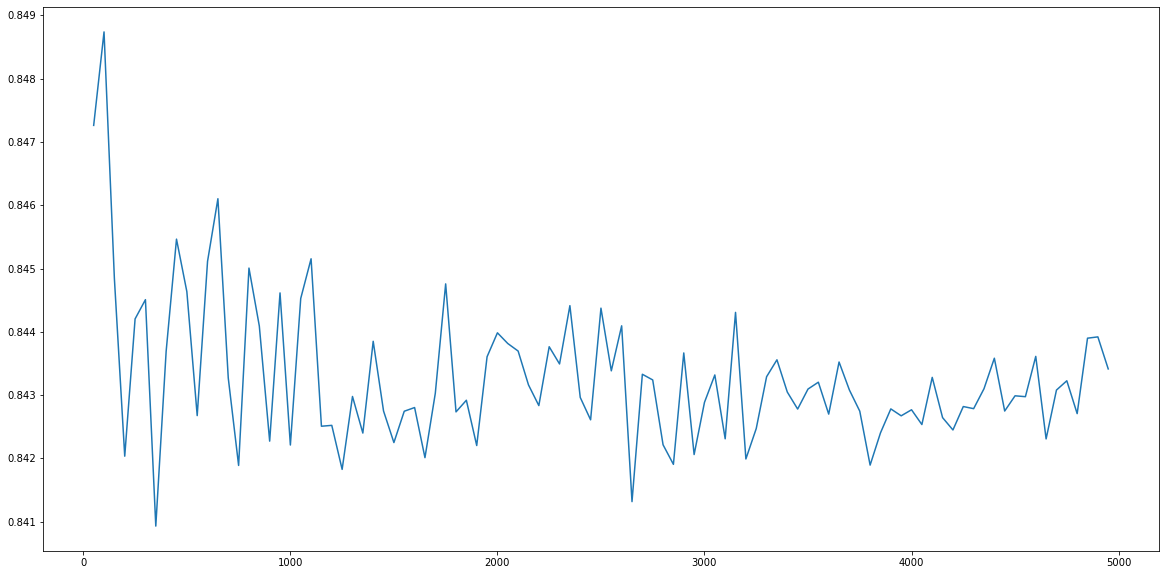

In [324]:
plt.plot(list(range(50,5000,50)),rscore)

In [325]:
max(rscore)

0.8487381288447677

# GradientBoostRegressor

In [327]:
from sklearn.ensemble import GradientBoostingRegressor

In [331]:
rscore=[]
for i in range(50,5000,50):
    reg_gb=GradientBoostingRegressor(n_estimators=i)
    reg_gb.fit(X_train,y_train)
    c=reg_gb.score(X_test,y_test)
    rscore.append(c)

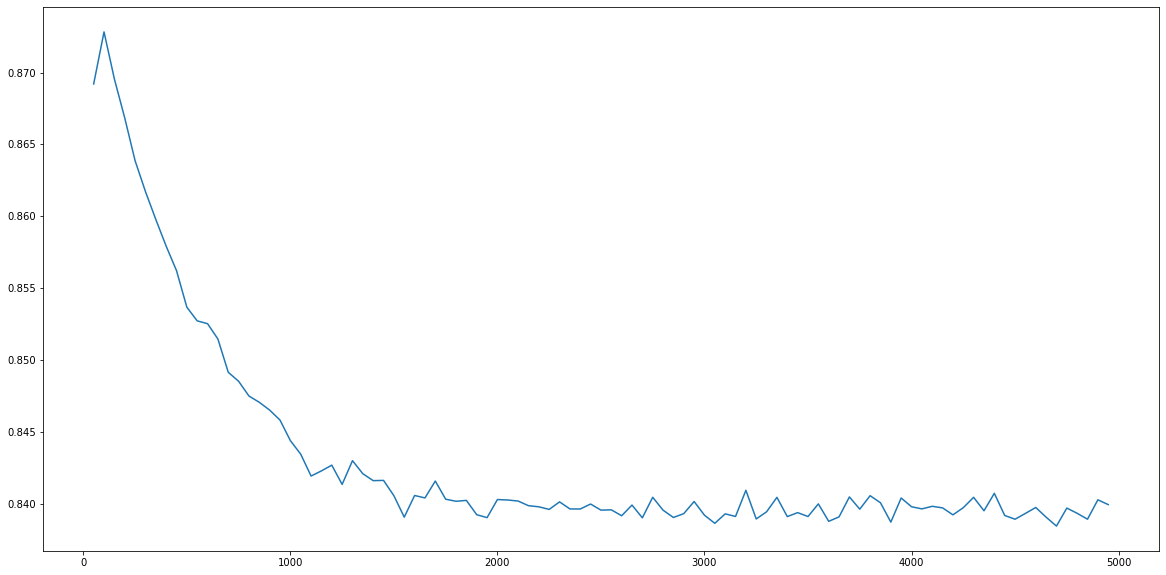

In [332]:
plt.plot(list(range(50,5000,50)),rscore)

# Stacking ensemble

In [337]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [338]:
dt=DecisionTreeRegressor(max_depth=6,max_leaf_nodes= 16,min_samples_leaf= 10,min_samples_split= 10)

In [342]:
estimators = [
...     ('lr', LinearRegression()),
...     ('ada', AdaBoostRegressor(base_estimator=dt,n_estimators=100)),
        ('gb',GradientBoostingRegressor(n_estimators=100)),]
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10) )

In [343]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('ada',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                                                      max_leaf_nodes=16,
                                                                                      min_samples_leaf=10,
                                                                                      min_samples_split=10),
                                                 n_estimators=100)),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=RandomForestRegressor(n_estimators=10))

In [344]:
reg.score(X_test,y_test)

0.8512904235977647